<a href="https://colab.research.google.com/github/Priyanshi11Gupta/PowerBi-projects/blob/main/Telecom_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ast

In [3]:
#import Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#load Dataset
telecom_df = pd.read_csv('/content/drive/MyDrive/Datasets/Telecom Churn.csv')
telecom_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [5]:
#Dataset First Look
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
#Dataset Rows & Columns count
telecom_df.shape

(3333, 20)

In [7]:
#Dataset Info
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [8]:
telecom_df.duplicated().sum()

0

In [9]:
#Missing Values/Null Values Count
telecom_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

<Axes: >

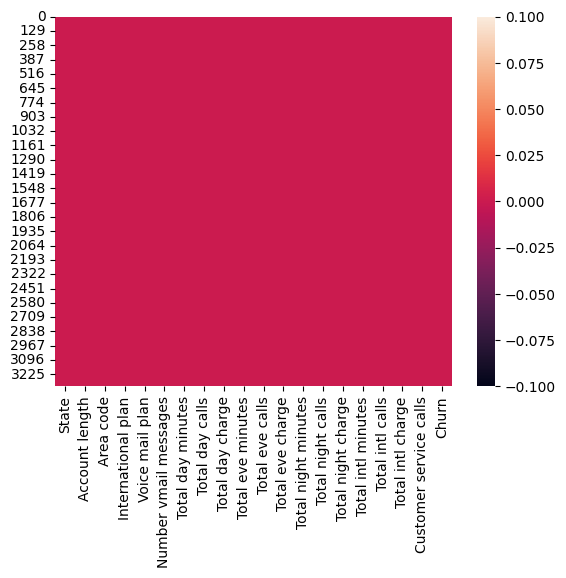

In [10]:
#Visualising the missing values
sns.heatmap(telecom_df.isnull())

In [11]:
# Dataset Columns
telecom_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [12]:
#Dataset Describe
telecom_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [13]:
#Check unique values for each variable
for i in telecom_df.columns:
  print("No. of unique values in ",i, "is", telecom_df[i].nunique())

No. of unique values in  State is 51
No. of unique values in  Account length is 212
No. of unique values in  Area code is 3
No. of unique values in  International plan is 2
No. of unique values in  Voice mail plan is 2
No. of unique values in  Number vmail messages is 46
No. of unique values in  Total day minutes is 1667
No. of unique values in  Total day calls is 119
No. of unique values in  Total day charge is 1667
No. of unique values in  Total eve minutes is 1611
No. of unique values in  Total eve calls is 123
No. of unique values in  Total eve charge is 1440
No. of unique values in  Total night minutes is 1591
No. of unique values in  Total night calls is 120
No. of unique values in  Total night charge is 933
No. of unique values in  Total intl minutes is 162
No. of unique values in  Total intl calls is 21
No. of unique values in  Total intl charge is 162
No. of unique values in  Customer service calls is 10
No. of unique values in  Churn is 2


In [14]:
#Write your code to make your dataset analysis ready
print("No. of customer Churning :",telecom_df[telecom_df['Churn']==True].Churn.count())

#Variable Assigning to churned data
churn_df = telecom_df[telecom_df['Churn']==True]

#Total No of Unique Area Code
print("No Unique Area Code :", telecom_df['Area code'].nunique())

#Customer On which Internatinal plan is activated
print("No of customer with international plan activated :", telecom_df[telecom_df['International plan']=='Yes']['International plan'].count())

#Customer On which Voice mail plan is activated
print("No of customer with Voice mail plan activated :", telecom_df[telecom_df['Voice mail plan']=='Yes']['Voice mail plan'].count())

churn_df



No. of customer Churning : 483
No Unique Area Code : 3
No of customer with international plan activated : 323
No of customer with Voice mail plan activated : 922


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [15]:
print("Total no. of customers:", telecom_df['Churn'].count())
perc_churn = (telecom_df['Churn'].sum() / telecom_df['Churn'].count()) * 100
print(f"Percentage of customers churning: {round(perc_churn, 2)}%")


Total no. of customers: 3333
Percentage of customers churning: 14.49%


In [16]:
#Statewise customer churning
state_cust_churn = churn_df.groupby(['State'])['Churn'].value_counts().reset_index(name='Churn_customer')
print(state_cust_churn.sum())
state_cust_churn

State             AKALARAZCACOCTDCDEFLGAHIIAIDILINKSKYLAMAMDMEMI...
Churn                                                            51
Churn_customer                                                  483
dtype: object


,State,Churn,Churn_customer
0,AK,True,3
1,AL,True,8
2,AR,True,11
3,AZ,True,4
4,CA,True,9
5,CO,True,9
6,CT,True,12
7,DC,True,5
8,DE,True,9
9,FL,True,8


In [17]:
#Account length wise churn data
acc_len_churn = churn_df.groupby(['Account length'])['Churn'].value_counts().reset_index(name='values')
acc_len_churn

,Account length,Churn,values
0,1,True,1
1,2,True,1
2,12,True,1
3,13,True,1
4,16,True,1
...,...,...,...
159,208,True,1
160,209,True,1
161,212,True,1
162,224,True,1


In [18]:
# Area Code wise churn Percentage
Area_code_churn_perc = (telecom_df.groupby(['Area code'])['Churn'].mean()*100).reset_index()
Area_code_churn_perc

,Area code,Churn
0,408,14.558473
1,415,14.259819
2,510,14.880952


In [19]:
#Area code wise Churn Count
Area_code_churn_count = churn_df.groupby(['Area code'])['Churn'].value_counts().reset_index(name='Counts')
Area_code_churn_count

,Area code,Churn,Counts
0,408,True,122
1,415,True,236
2,510,True,125


In [20]:
#Poor connectivity by intersection of state by area code
Area_state_churn = churn_df.groupby(['Area code'])['State'].unique().reset_index(name='Unique state')
Area_state_churn

,Area code,Unique state
0,408,"[CO, AZ, MD, NY, IN, MS, VT, VA, KS, SD, RI, O..."
1,415,"[IN, NY, ID, WY, DC, NJ, LA, NV, MS, OH, AK, M..."
2,510,"[TX, ME, MS, FL, MN, OK, SD, WI, DE, KS, OH, W..."


In [21]:
#Assigning the list of state of each area
Area_408_state_churn = Area_state_churn.loc[0, 'Unique state']
Area_415_state_churn = Area_state_churn.loc[1, 'Unique state']
Area_510_state_churn = Area_state_churn.loc[2, 'Unique state']

inter_1=set(Area_408_state_churn).intersection(set(Area_415_state_churn))
poor_connectivity_states = set(inter_1).intersection(set(Area_510_state_churn))

print(f"Intersection by different areas code of churning gives{len(poor_connectivity_states)} poor connectivity states")
print("Try to short down the list of state by different dataset to generate more precise poor connectivity states")

Intersection by different areas code of churning gives38 poor connectivity states
Try to short down the list of state by different dataset to generate more precise poor connectivity states


In [22]:
#Percentage of Customer with and without international Plan churning to other networks
int1_plan_churn = (telecom_df.groupby(['International plan'])['Churn'].mean()*100).reset_index(name='Churn %')
print(int1_plan_churn)

#Total number of Customer churning with international plan
churn_int1_yes = churn_df[churn_df['International plan']=='Yes']
print(f"No of Customers churning having Internatinal plan is {churn_int1_yes['International plan'].value_counts()[0]}")

#Total number of Customer churning without international plan
churn_int1_no = churn_df[churn_df['International plan']=='No']
print(f"No of Customers churning without having International plan is {churn_int1_no['International plan'].value_counts()[0]}")

  International plan    Churn %
0                 No  11.495017
1                Yes  42.414861
No of Customers churning having Internatinal plan is 137
No of Customers churning without having International plan is 346


In [23]:
# Combining Data of International plan and Voice mail plan

# Customers churning having International plan and Voice mail plan
int1_vmail_yes = churn_df[(churn_df['International plan'] == 'Yes') & (churn_df['Voice mail plan'] == 'Yes')]
print(f"No of Customers churning having International and Voice mail plan are {int1_vmail_yes['Churn'].value_counts().get(1, 0)}")

# Customers churning having no International plan and no Voice mail plan
int1_vmail_no = churn_df[(churn_df['International plan'] == 'No') & (churn_df['Voice mail plan'] == 'No')]
print(f"No of Customers churning having no International plan and no Voice mail plan are {int1_vmail_no['Churn'].value_counts().get(1, 0)}")

# Customers churning having International plan but no Voice mail plan
int1_yes_vmail_no = churn_df[(churn_df['International plan'] == 'Yes') & (churn_df['Voice mail plan'] == 'No')]
print(f"No of Customers churning having International plan but no Voice mail plan are {int1_yes_vmail_no['Churn'].value_counts().get(1, 0)}")

# Customers churning having no International plan but Voice mail plan
int1_no_vmail_yes = churn_df[(churn_df['International plan'] == 'No') & (churn_df['Voice mail plan'] == 'Yes')]
print(f"No of Customers churning having no International plan but Voice mail plan are {int1_no_vmail_yes['Churn'].value_counts().get(1, 0)}")


No of Customers churning having International and Voice mail plan are 0
No of Customers churning having no International plan and no Voice mail plan are 0
No of Customers churning having International plan but no Voice mail plan are 0
No of Customers churning having no International plan but Voice mail plan are 0


In [24]:
# Poor Connectivity States
# States Sorted with respect to international and voice mail plan
state_int1_vmail_yes = int1_vmail_yes['State'].unique()
state_int1_vmail_no = int1_vmail_no['State'].unique()
state_int1_yes_vmail_no = int1_yes_vmail_no['State'].unique()
state_int1_no_vmail_yes = int1_no_vmail_yes['State'].unique()

# Intersection of 4 types of plans made
inter_1 = set(state_int1_vmail_yes).intersection(set(state_int1_vmail_no))
inter_2 = set(state_int1_yes_vmail_no).intersection(set(state_int1_no_vmail_yes))
Intersection = set(inter_1).intersection(set(inter_2))

print(f"List of poor connectivity states are: {list(Intersection)}")


List of poor connectivity states are: ['GA', 'SD', 'WV', 'NC', 'MA', 'NV', 'MN', 'KS', 'NJ', 'MI']


In [25]:
#Percentage of People with number of Voice mail messages churning/not-churning to other networks
vmail_mssg_churn = telecom_df.groupby(['Churn'])['Number vmail messages'].mean().reset_index(name='perc_vmail_mssg')
vmail_mssg_churn

,Churn,perc_vmail_mssg
0,False,8.604561
1,True,5.115942


In [26]:
#Day Data
#Percentage of people churning with the average day mins,calls and charge.
telecom_df.groupby(['Churn'])['Total day minutes'].mean().reset_index(name='perc_day_mins')

,Churn,perc_day_mins
0,False,175.175754
1,True,206.914079


In [27]:
telecom_df.groupby(['Churn'])['Total day calls'].mean().reset_index(name='perc_day_calls')

,Churn,perc_day_calls
0,False,100.283158
1,True,101.335404


In [28]:
telecom_df.groupby(['Churn'])['Total day charge'].mean().reset_index(name='perc_day_charge')

,Churn,perc_day_charge
0,False,29.780421
1,True,35.175921


In [29]:
#Evening Data
#Percentage of people churning with the average Evening mins, calls, and charge
telecom_df.groupby(['Churn'])['Total eve minutes'].mean().reset_index(name='perc_eve_mins')

,Churn,perc_eve_mins
0,False,199.043298
1,True,212.410145


In [30]:
telecom_df.groupby(['Churn'])['Total eve calls'].mean().reset_index(name='perc_eve_calls')

,Churn,perc_eve_calls
0,False,100.038596
1,True,100.561077


In [31]:
telecom_df.groupby(['Churn'])['Total eve charge'].mean().reset_index(name='perc_eve_charge')

,Churn,perc_eve_charge
0,False,16.918909
1,True,18.054969


In [32]:
#Night Data
#Percentage of People churning with the average night mins, calls and charge
telecom_df.groupby(['Churn'])['Total night minutes'].mean().reset_index(name='perc_night_mins')

,Churn,perc_night_mins
0,False,200.133193
1,True,205.231677


In [33]:
telecom_df.groupby(['Churn'])['Total night calls'].mean().reset_index(name='perc_night_calls')

,Churn,perc_night_calls
0,False,100.058246
1,True,100.399586


In [34]:
telecom_df.groupby(['Churn'])['Total night charge'].mean().reset_index(name='perc_night_charge')

,Churn,perc_night_charge
0,False,9.006074
1,True,9.235528


In [35]:
#Intl Call Datatelecom_df.groupby(['Churn'])['Total eve charge'].mean().reset_index(name='perc_eve_charge')
#Percentage of people churning with the average internatinal mins,calls and charge
telecom_df.groupby(['Churn'])['Total intl minutes'].mean().reset_index(name='perc_intl_mins')

,Churn,perc_intl_mins
0,False,10.158877
1,True,10.700000


In [36]:
telecom_df.groupby(['Churn'])['Total intl calls'].mean().reset_index(name='perc_intl_calls')

,Churn,perc_intl_calls
0,False,4.532982
1,True,4.163561


In [37]:
telecom_df.groupby(['Churn'])['Total intl charge'].mean().reset_index(name='perc_intl_charge')

,Churn,perc_intl_charge
0,False,2.743404
1,True,2.889545


In [38]:
# Combining day, evening, and night calls, minutes, and charges
telecom_df['Total calls'] = telecom_df.loc[:,['Total day calls', 'Total eve calls', 'Total night calls']].sum(axis=1)
telecom_df['Total mins'] = telecom_df.loc[:,['Total day minutes', 'Total eve minutes', 'Total night minutes']].sum(axis=1)
telecom_df['Total charge'] = telecom_df.loc[:,['Total day charge', 'Total eve charge', 'Total night charge']].sum(axis=1)

# Minutes per call
telecom_df['min_per_call'] = telecom_df['Total mins'] / telecom_df['Total calls']

# Charge per minute
telecom_df['charge_per_min'] = telecom_df['Total charge'] / telecom_df['Total mins']

# International minutes per call
telecom_df['Intl_min_per_call'] = telecom_df['Total intl minutes'] / telecom_df['Total intl calls']

# International charge per minute
telecom_df['Intl_charge_per_min'] = telecom_df['Total intl charge'] / telecom_df['Total intl minutes']



In [39]:
# Customer Service Call data
print("No of unique service calls made:", telecom_df['Customer service calls'].nunique())

# Percentage of churning based on the customer service calls made
(telecom_df.groupby(['Customer service calls'])['Churn'].mean() * 100).reset_index(name='Perc_churned')


No of unique service calls made: 10


,Customer service calls,Perc_churned
0,0,13.199426
1,1,10.330229
2,2,11.462451
3,3,10.256410
4,4,45.783133
5,5,60.606061
6,6,63.636364
7,7,55.555556
8,8,50.000000
9,9,100.000000


Churn
False    2850
True      483
Name: count, dtype: int64
 


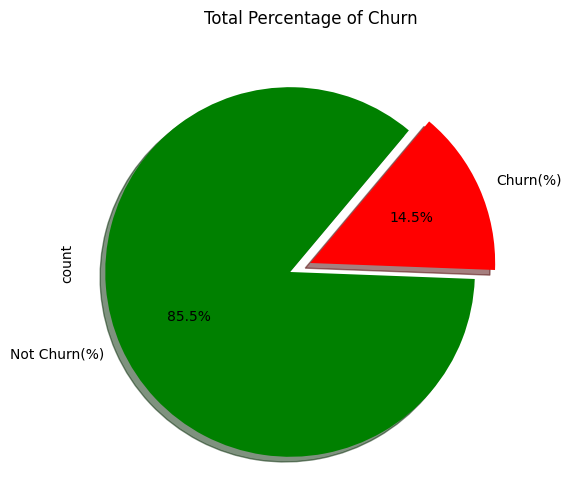

In [40]:
#Chart 1 Dependent Column Value Counts
print(telecom_df.Churn.value_counts())
print(" ")

#Dependent Variables Column Visualisation
telecom_df['Churn'].value_counts().plot(kind='pie', figsize=(10,6),
                                        autopct="%1.1f%%",
                                        startangle=50,
                                        shadow=True,
                                        labels=['Not Churn(%)', 'Churn(%)'],
                                        colors=['green','red'],explode=[0.12,0])
plt.title('Total Percentage of Churn')

#Displaying chart
plt.show()

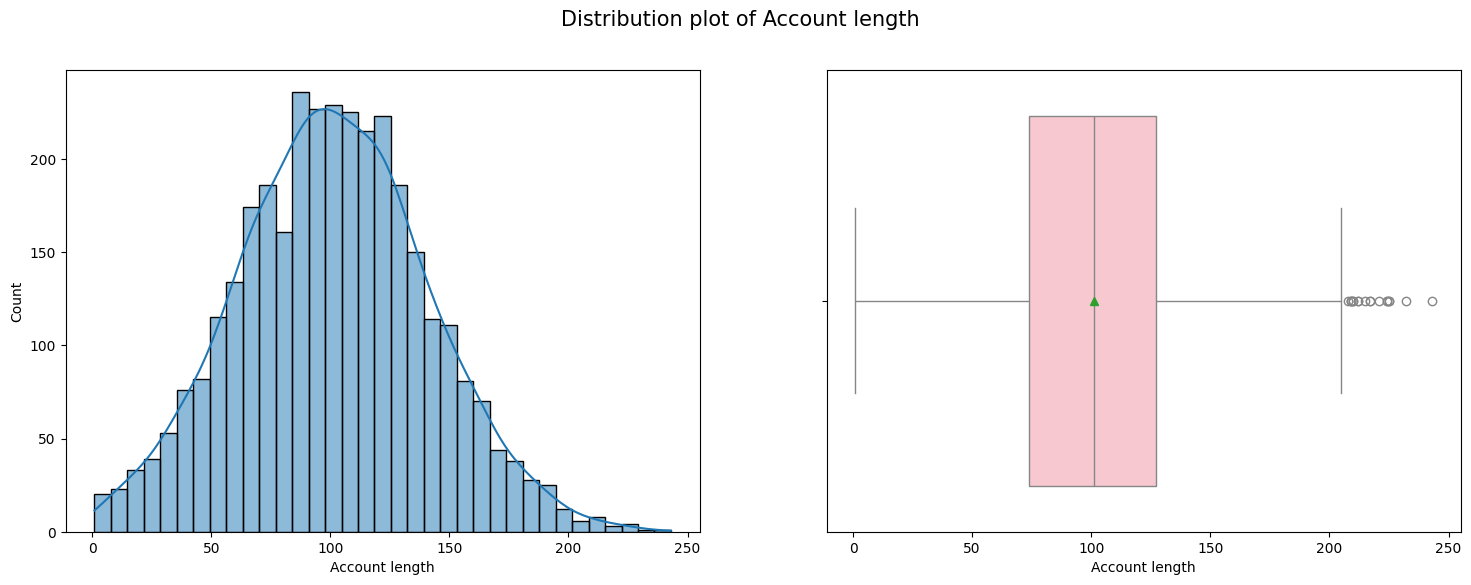

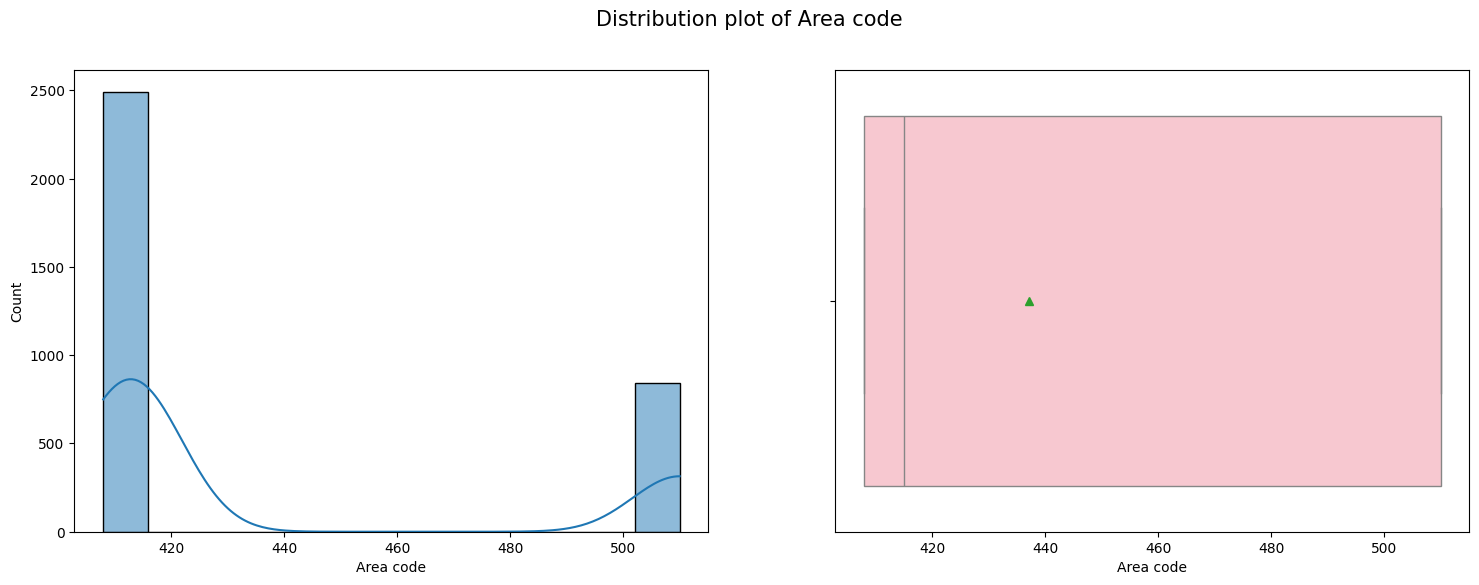

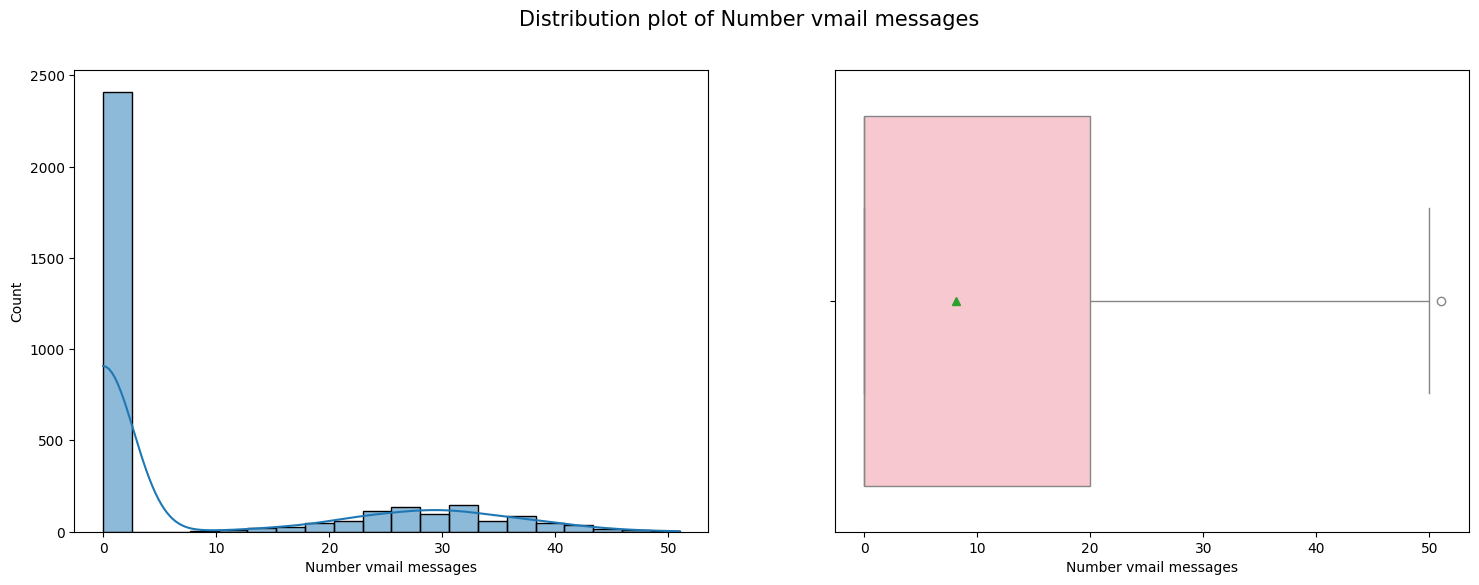

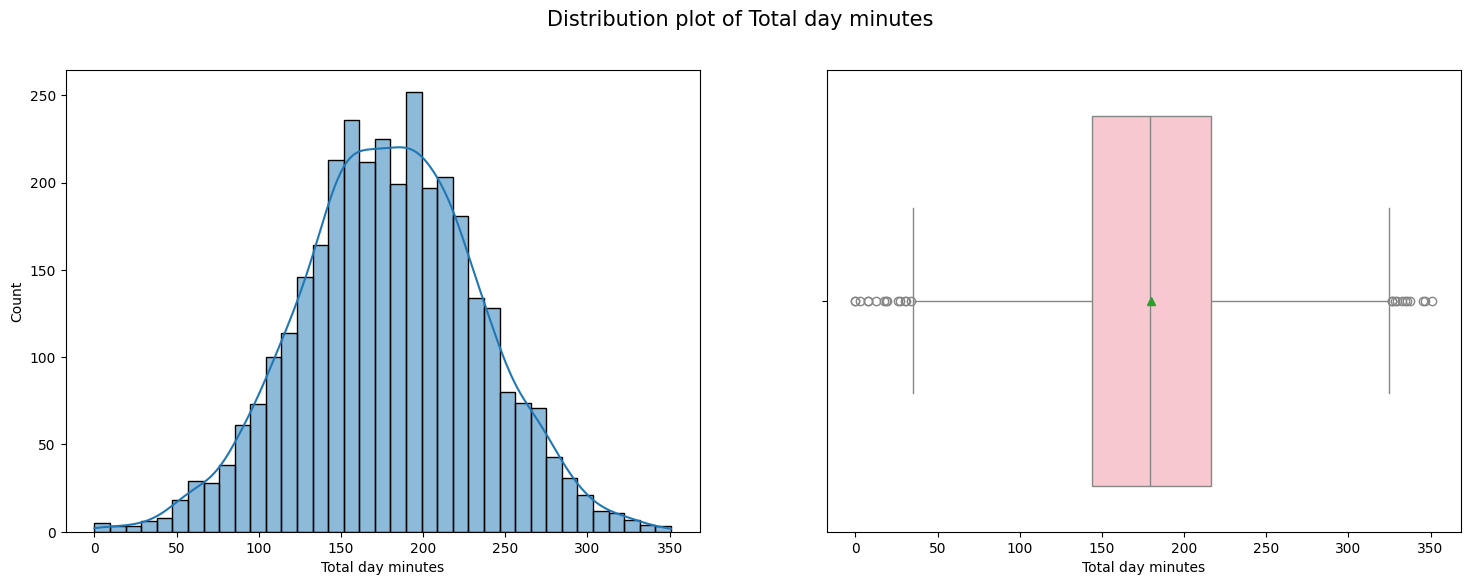

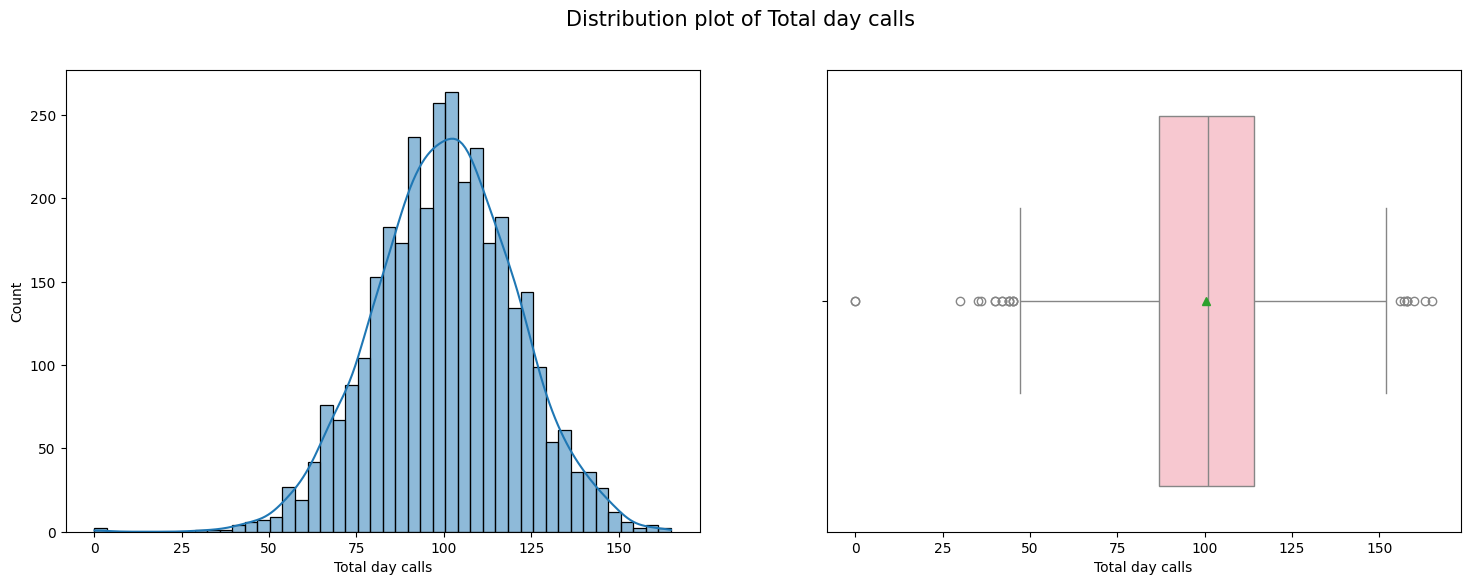

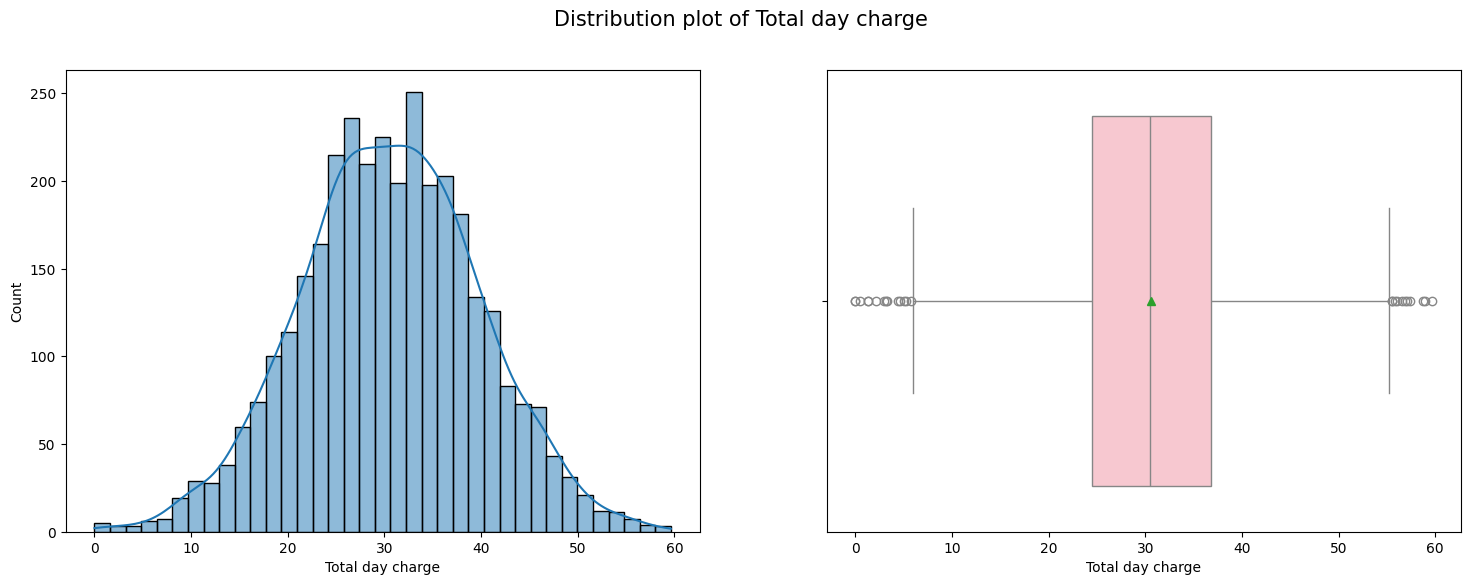

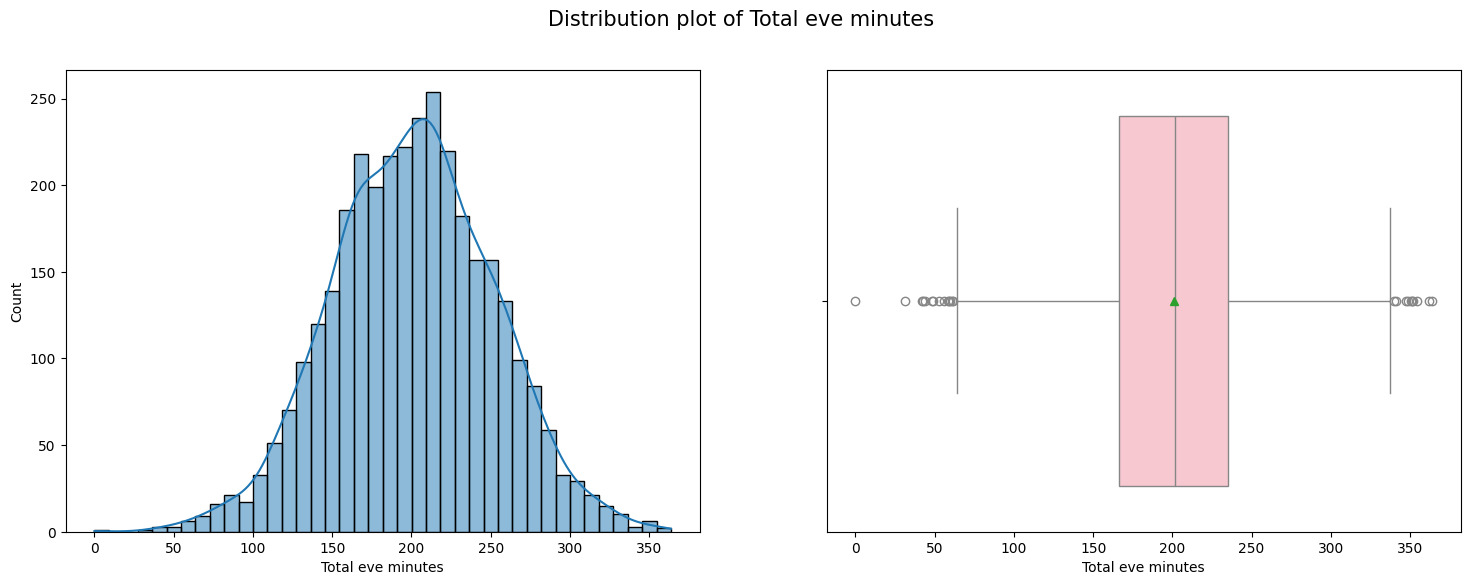

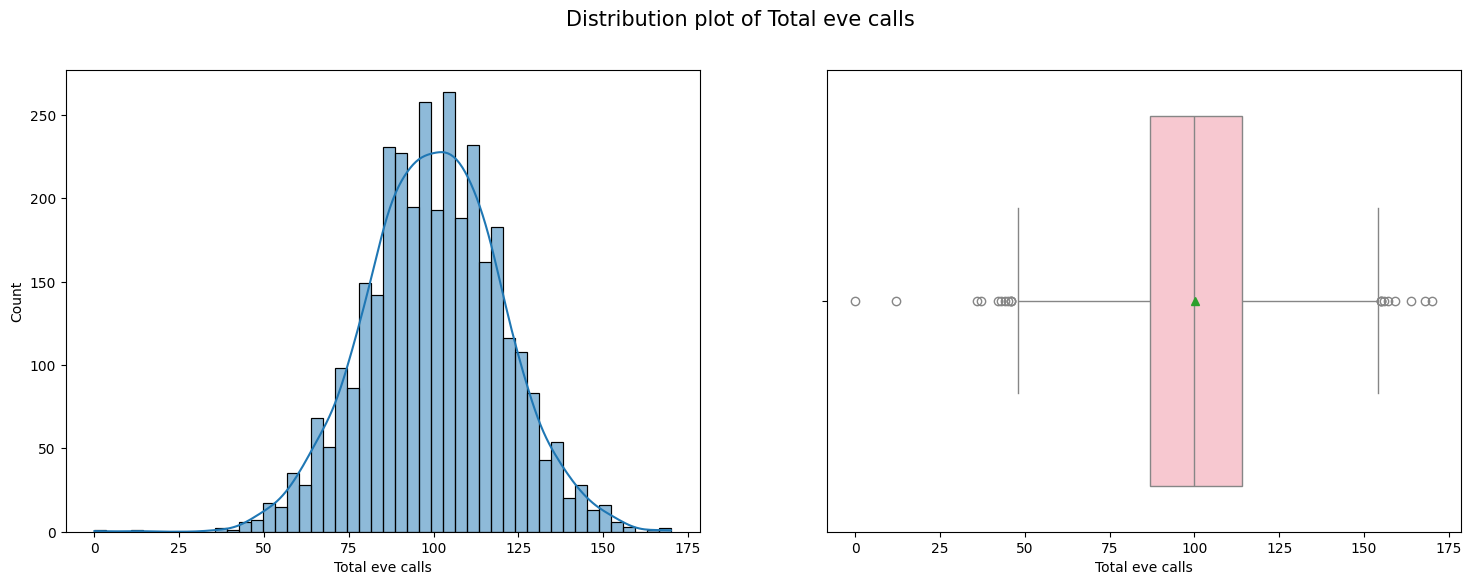

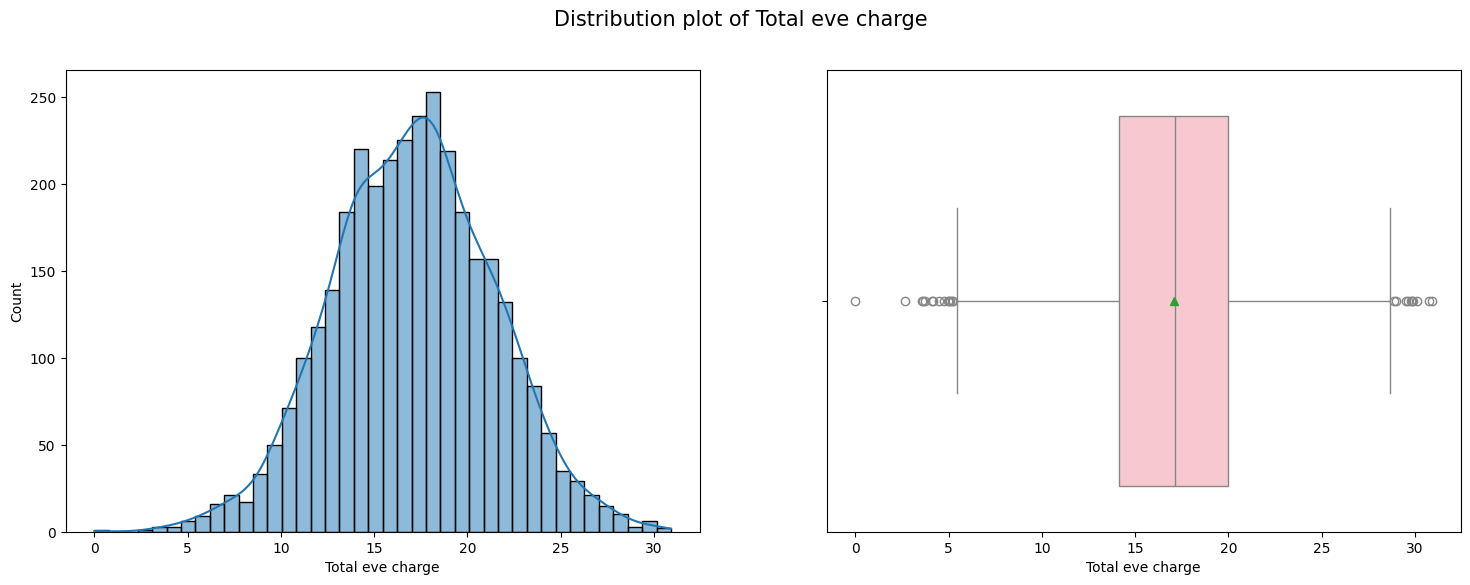

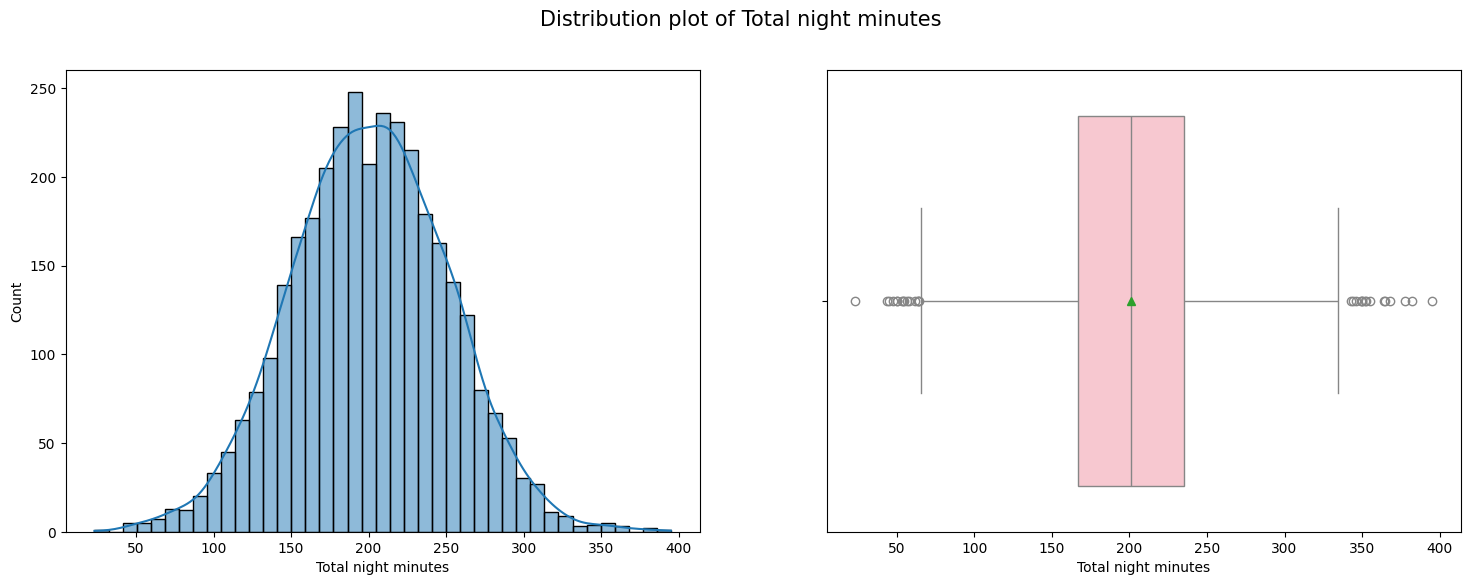

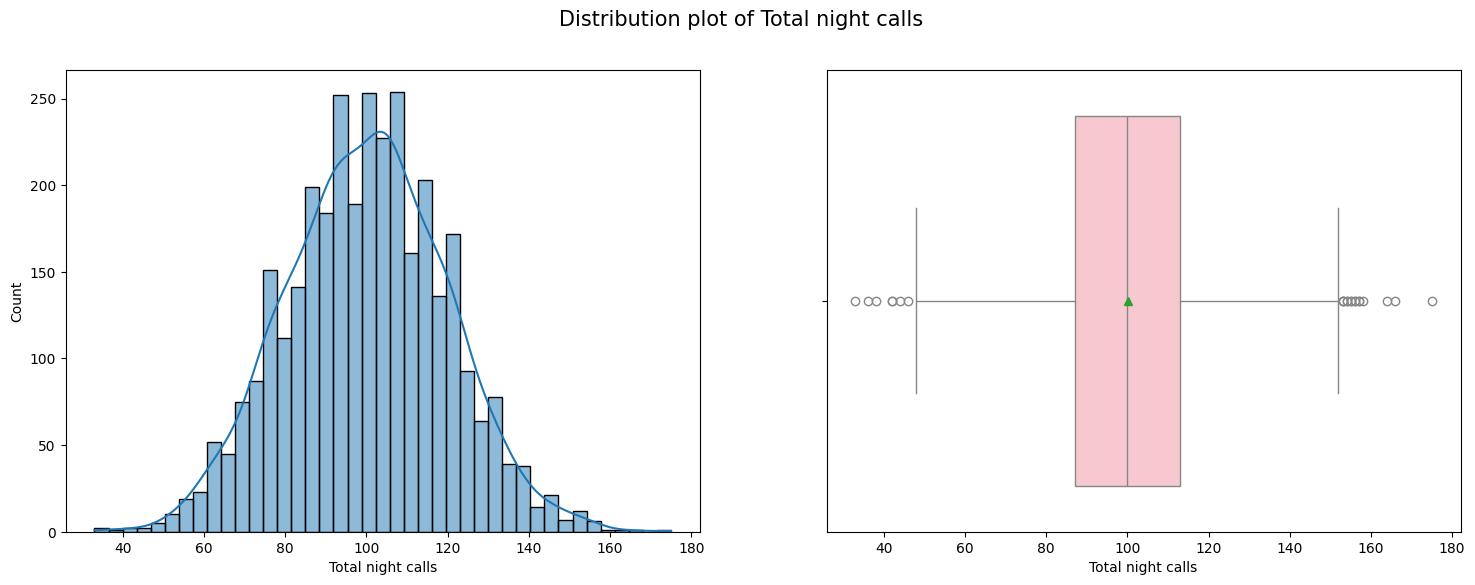

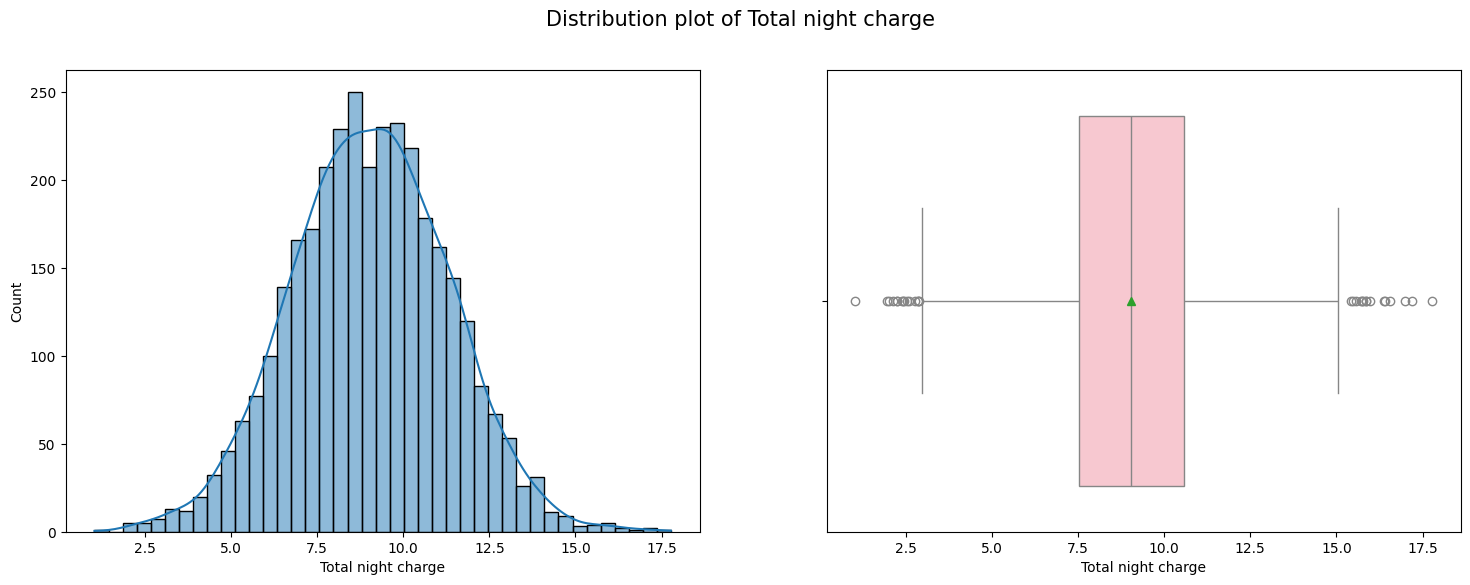

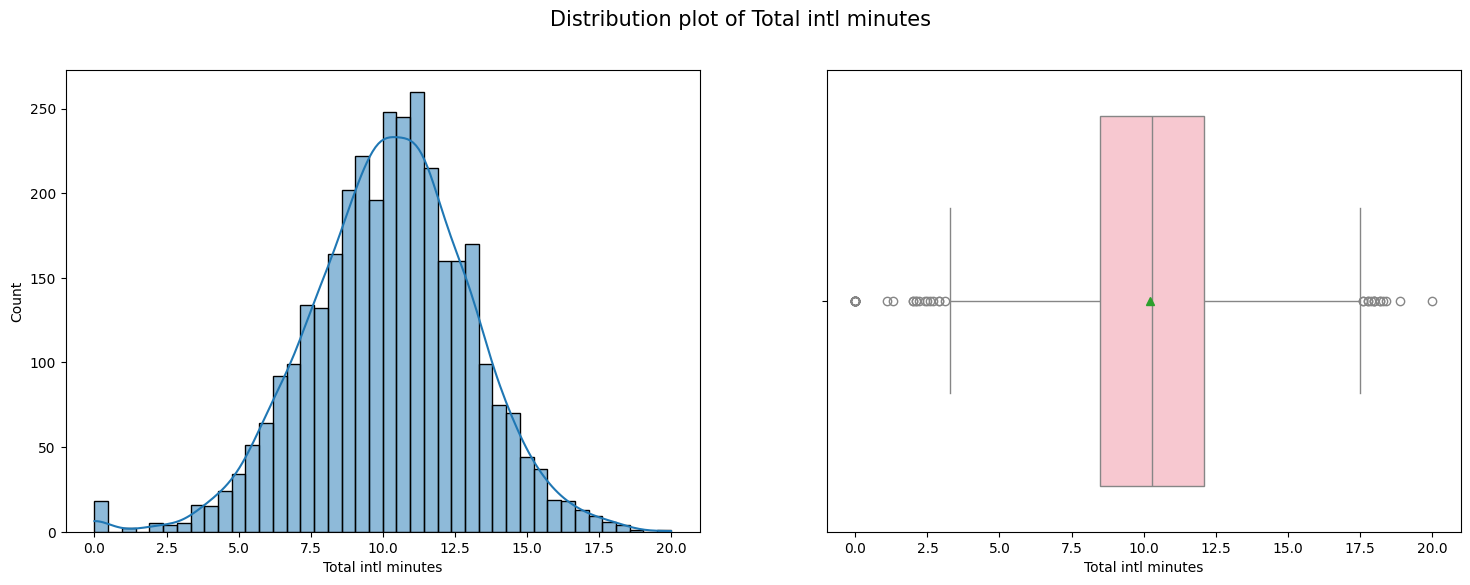

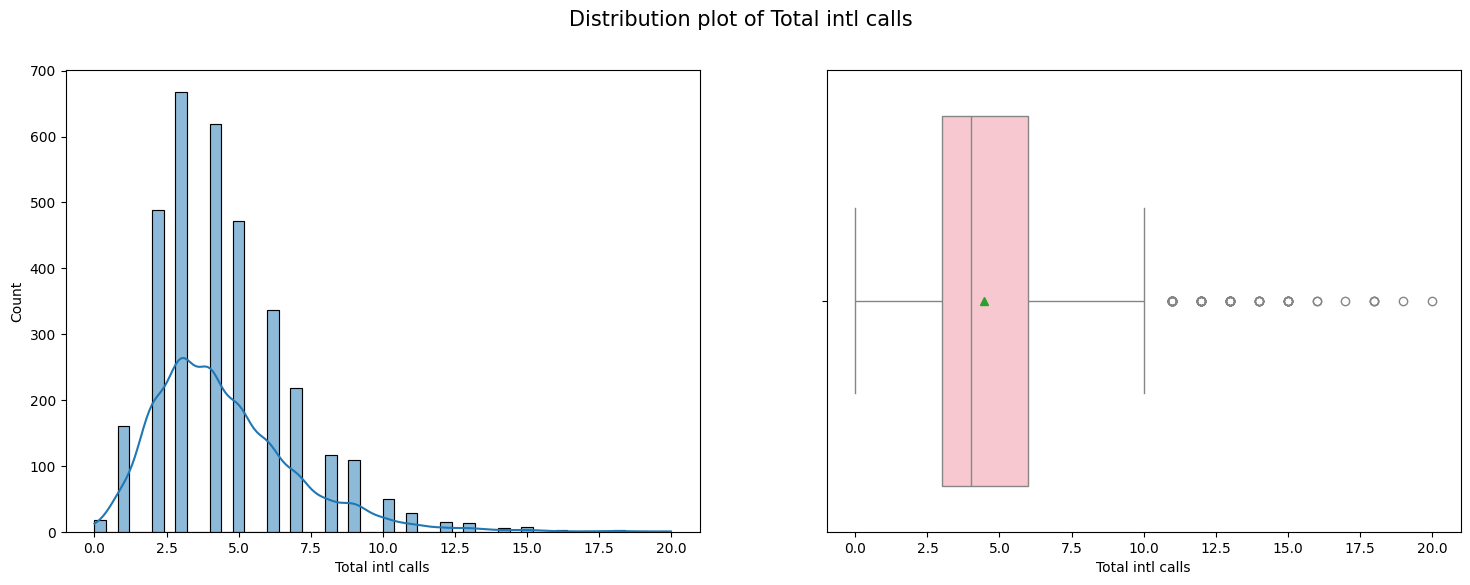

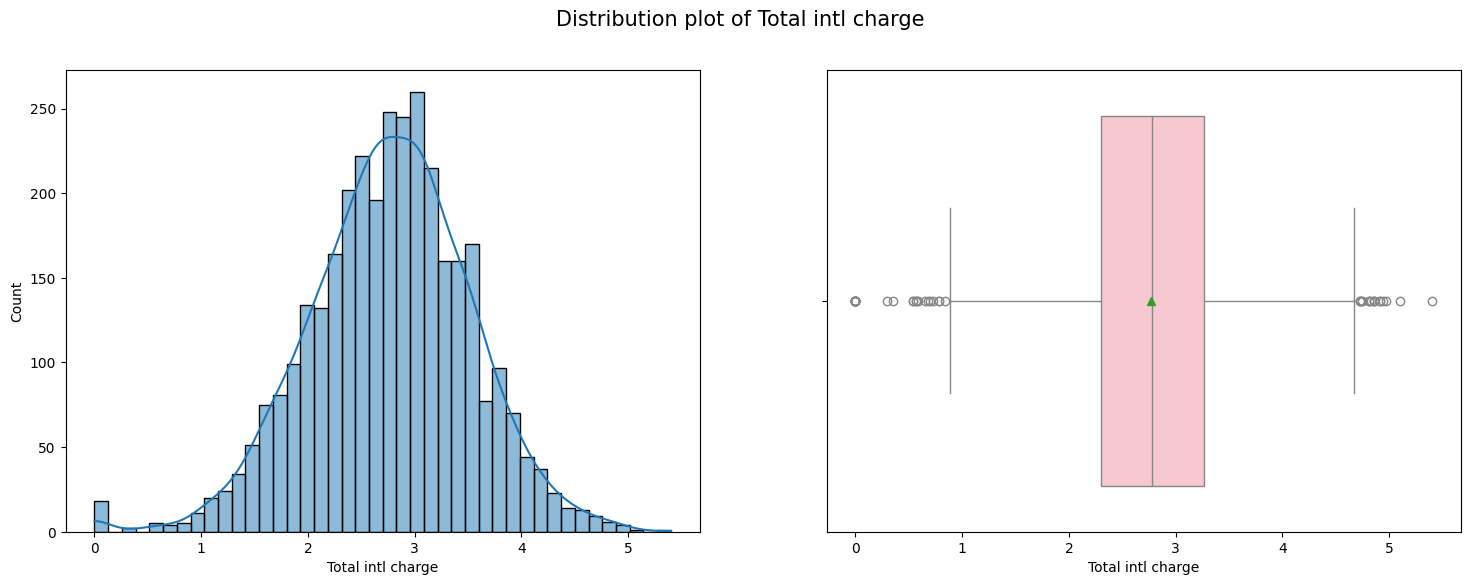

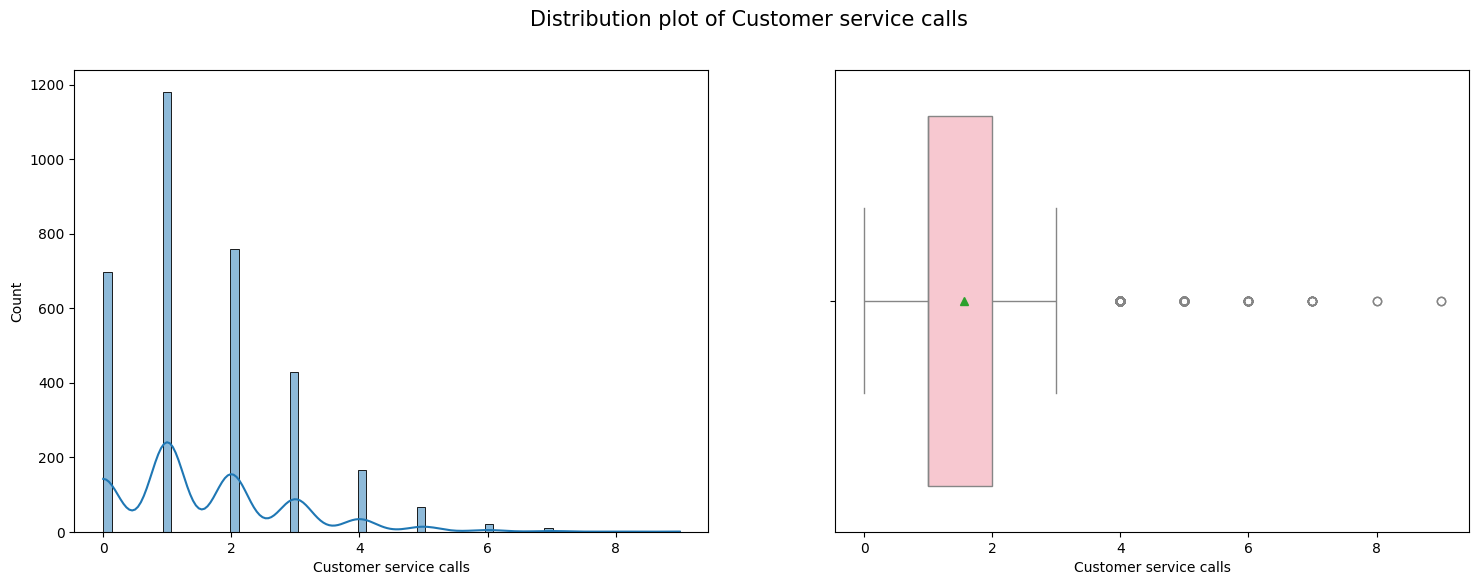

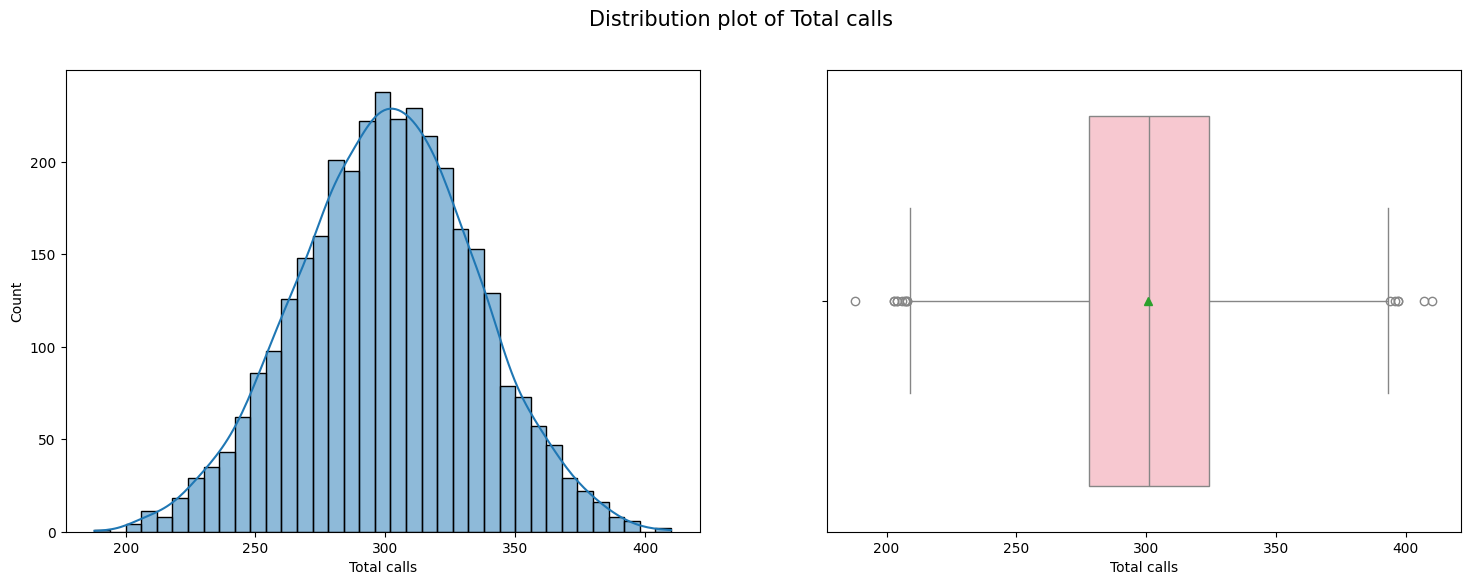

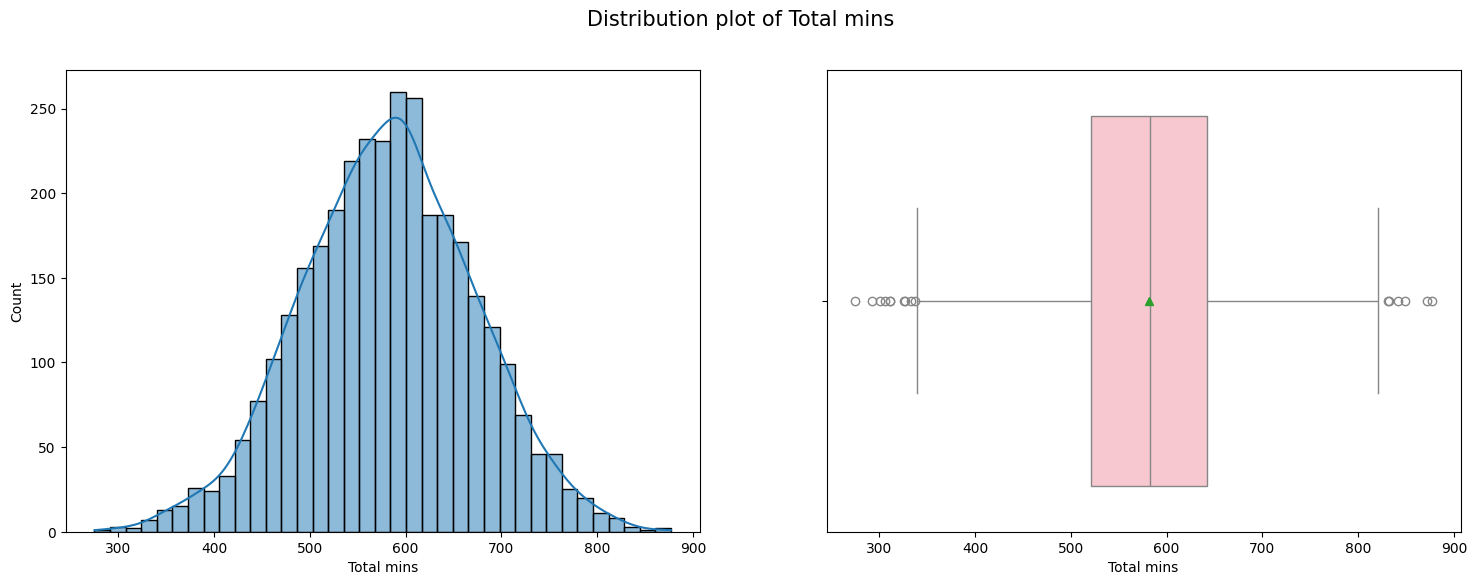

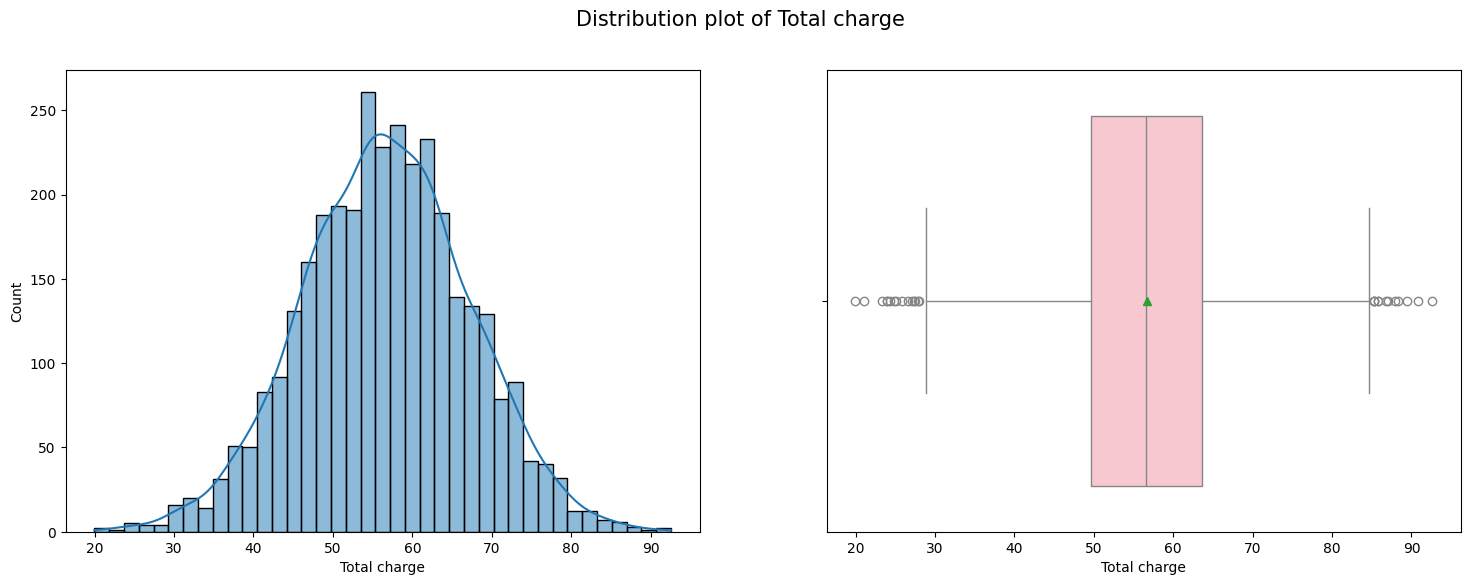

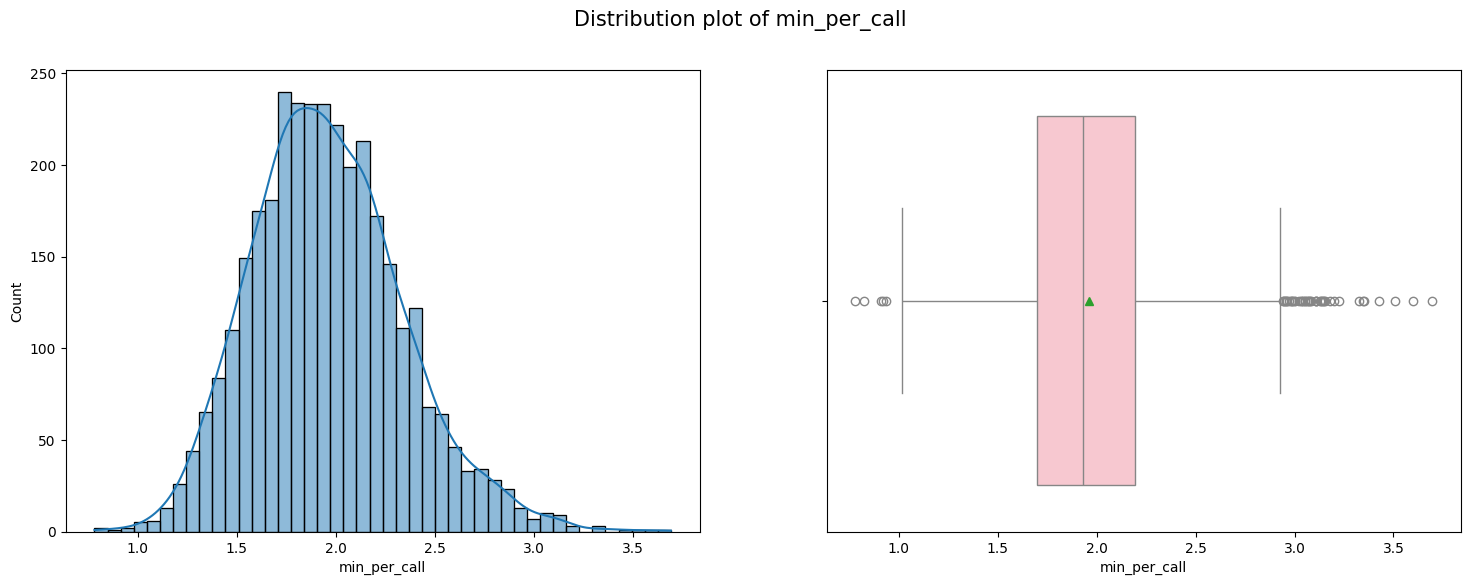

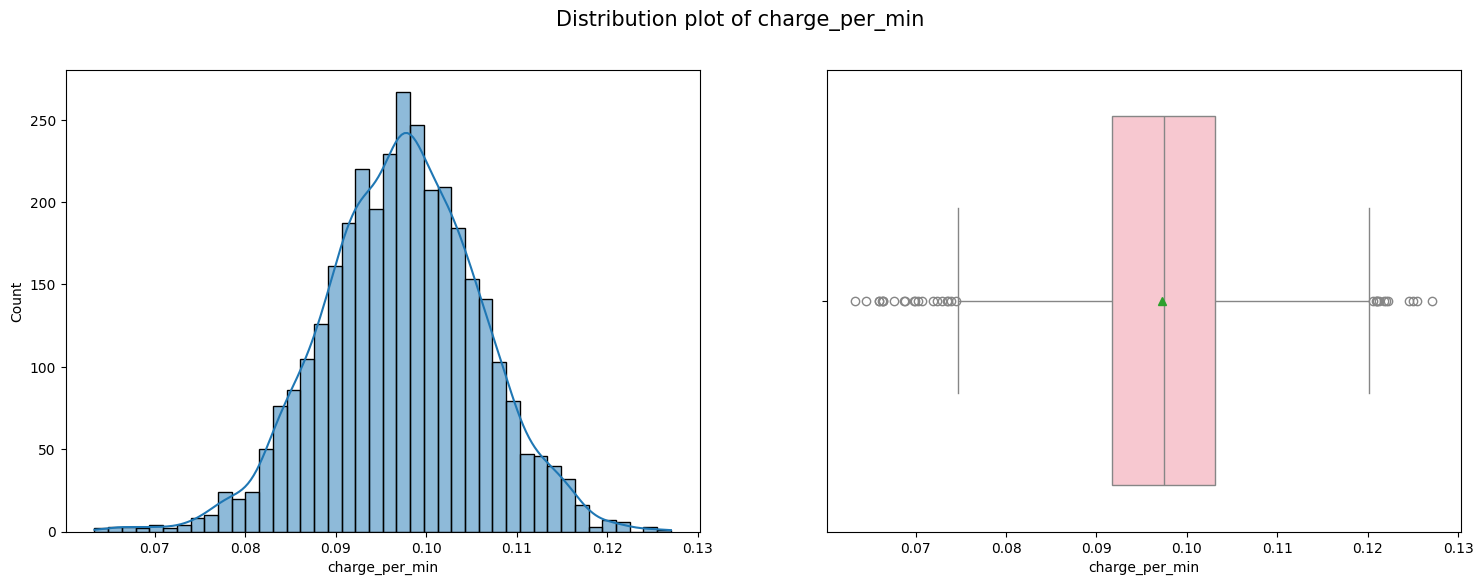

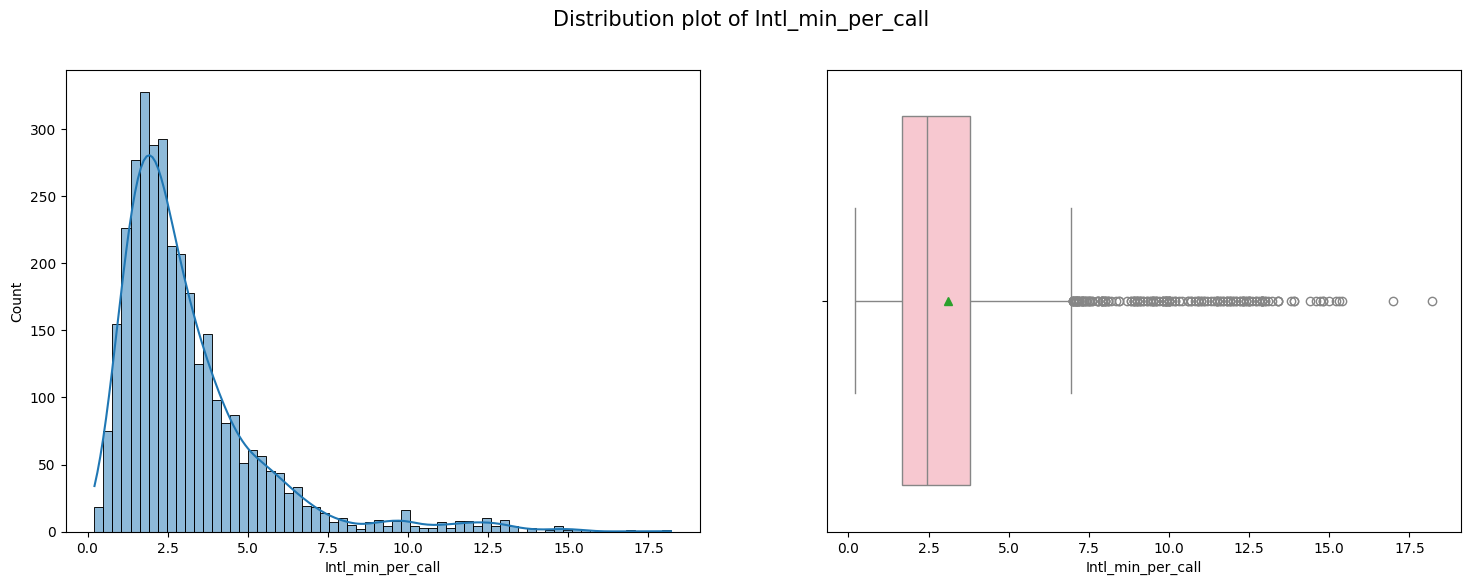

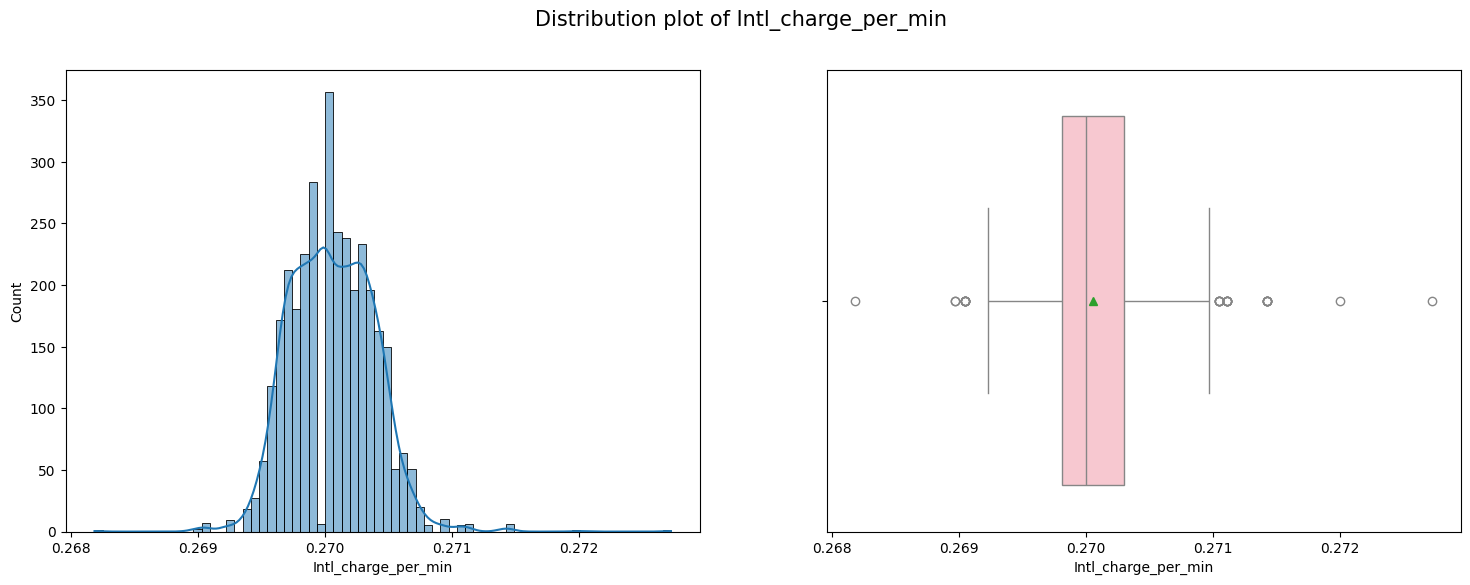

In [41]:
#Chart-2 Visualising code for histogram plot & boxplot for each column to know the data distribution

for col in telecom_df.describe().columns:
  fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
  sns.histplot(telecom_df[col], ax = axes[0],kde = True)
  sns.boxplot(telecom_df[col], ax = axes[1],orient='h',showmeans=True,color='pink')
  fig.suptitle("Distribution plot of "+ col, fontsize = 15)
  plt.show()

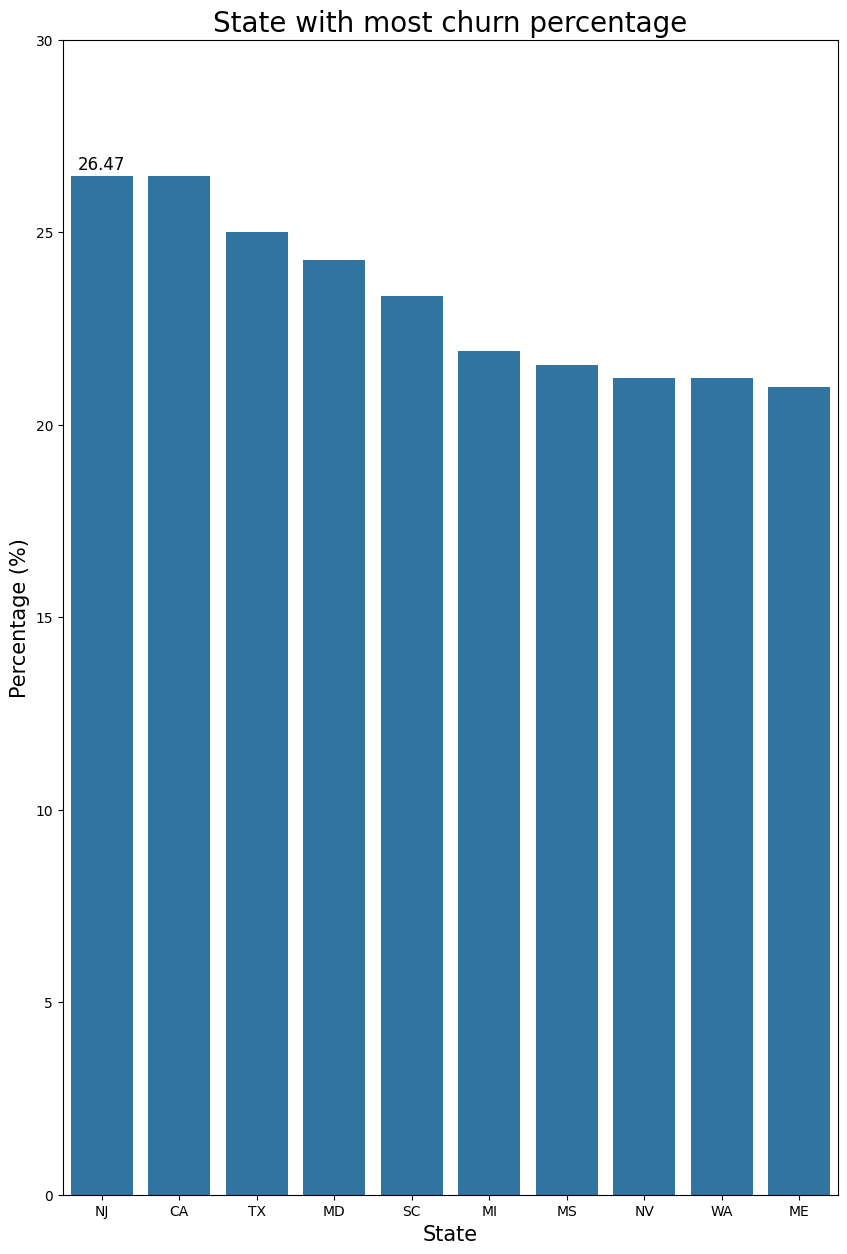

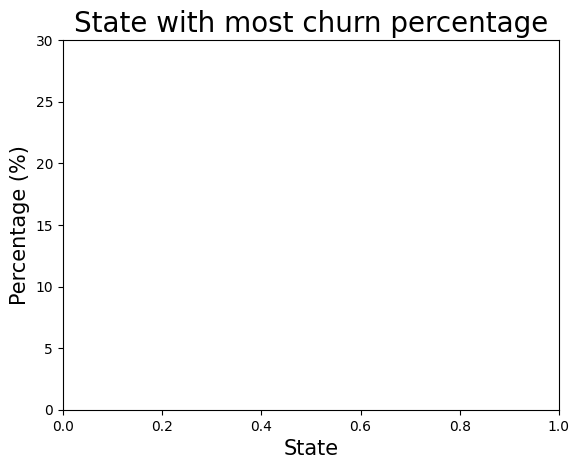

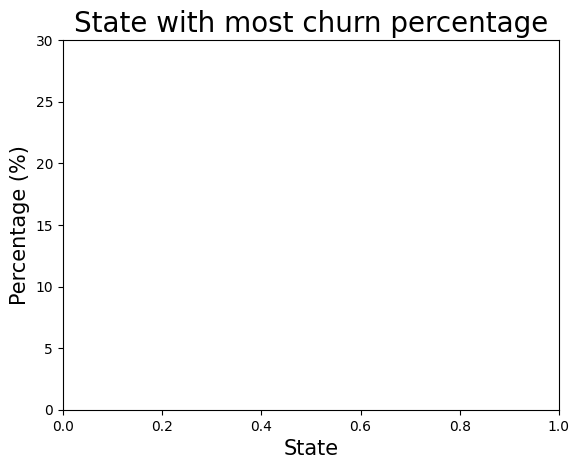

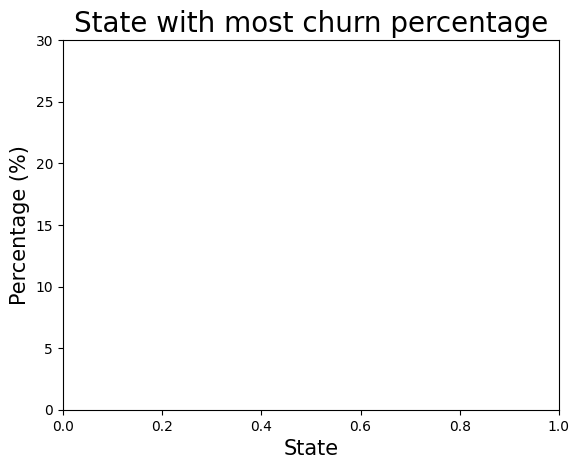

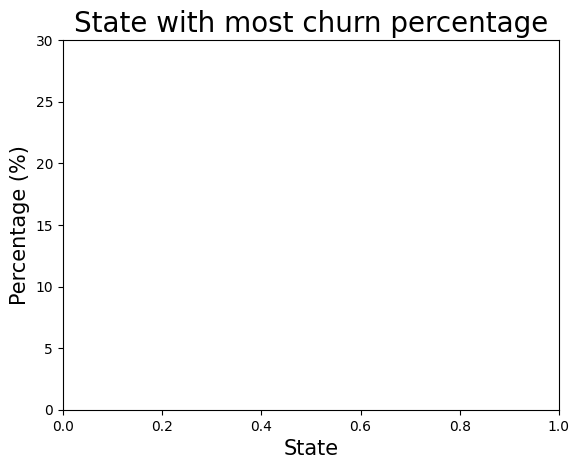

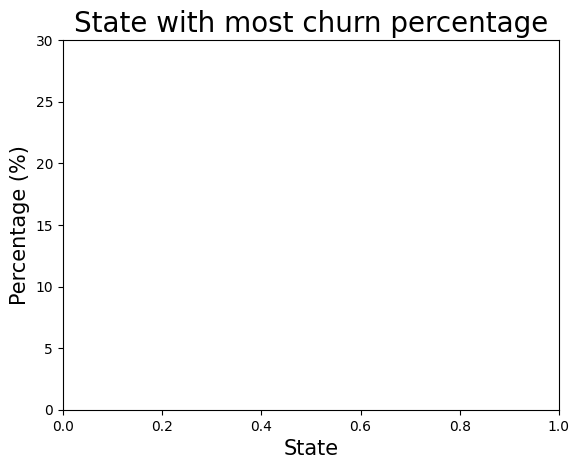

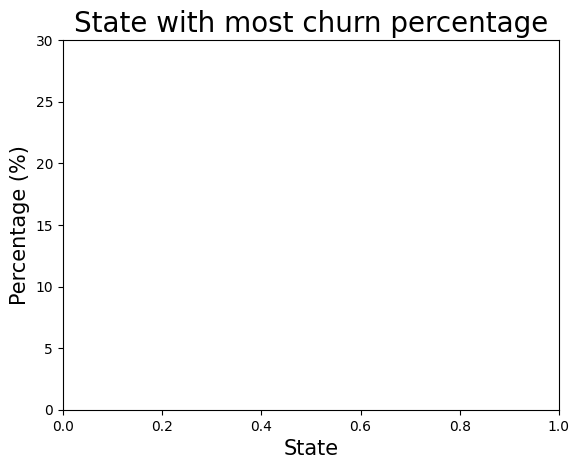

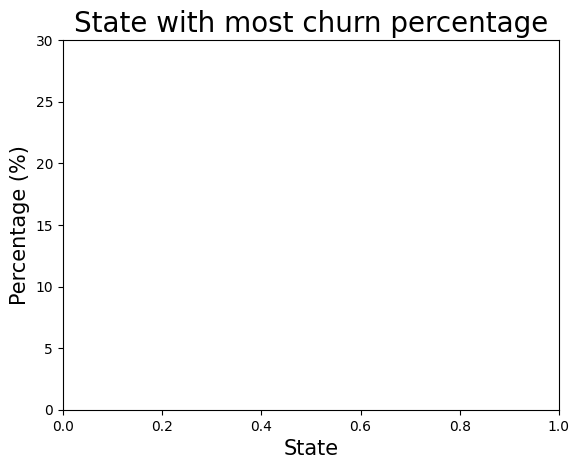

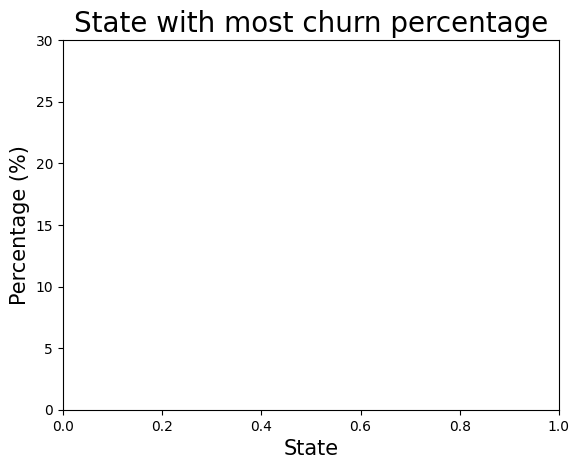

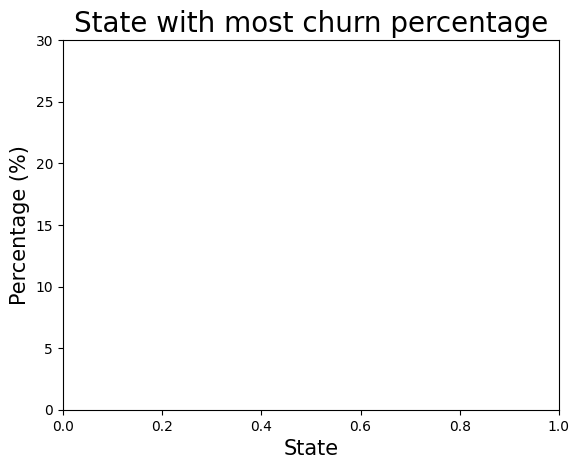

In [42]:
#Chart - 3 State vs. average true churn percentage visualisation code

#Visualisation top 10 churned state
plt.figure(figsize=(10,15))
bar1 = ((telecom_df.groupby(['State'])['Churn'].mean()*100).sort_values(ascending = False).reset_index(name="Average True Churn").head(10))
plots = sns.barplot(data = bar1, x = 'State', y="Average True Churn")
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                 size=12, xytext=(0, 8),
                 textcoords='offset points')

  plt.title("State with most churn percentage", fontsize = 20)
  plt.xlabel('State', fontsize = 15)
  plt.ylabel('Percentage (%)', fontsize = 15)
  # Setting limit of the y axis from 0 to 30
  plt.ylim(0,30)
  plt.show()

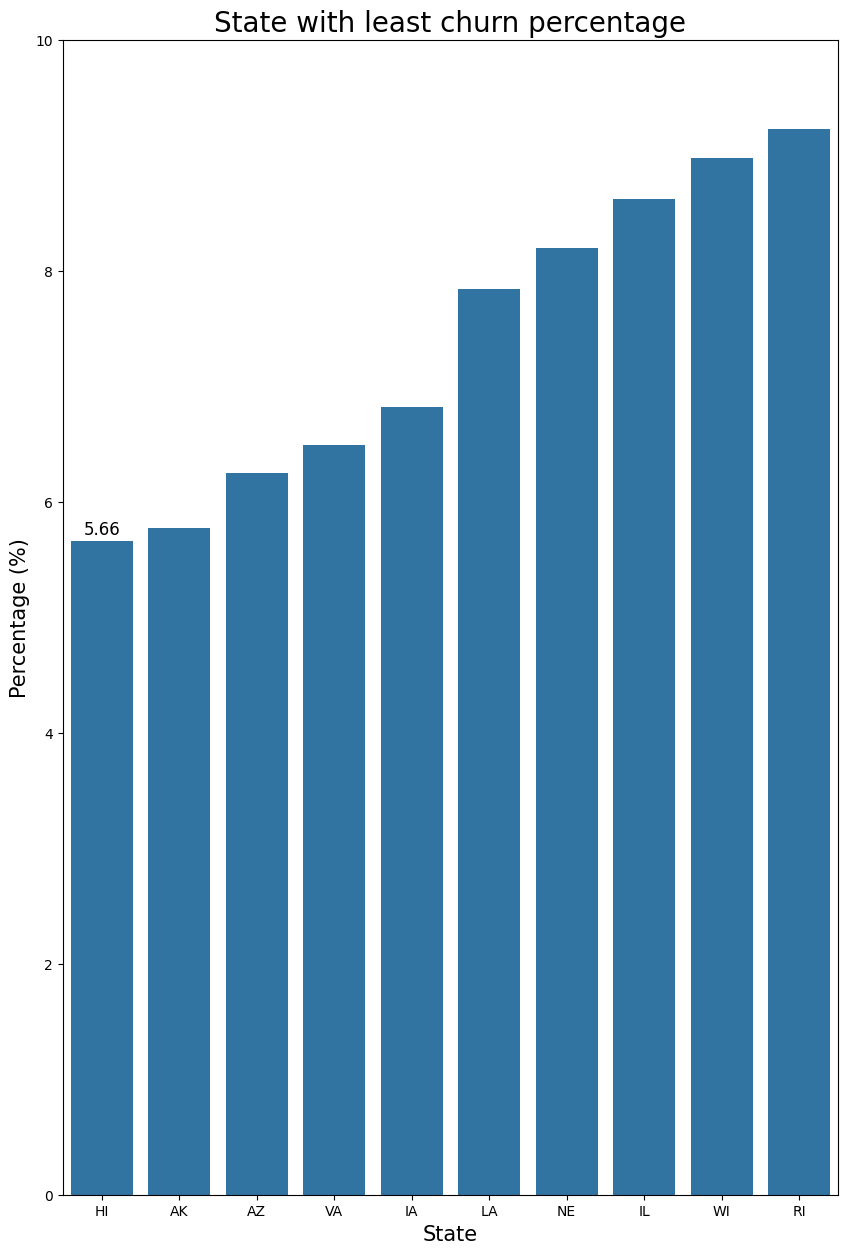

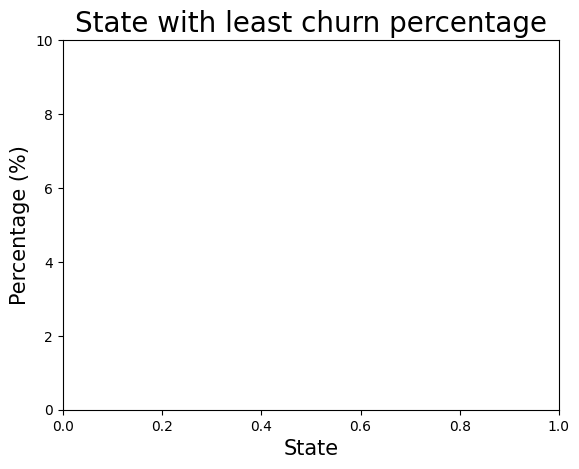

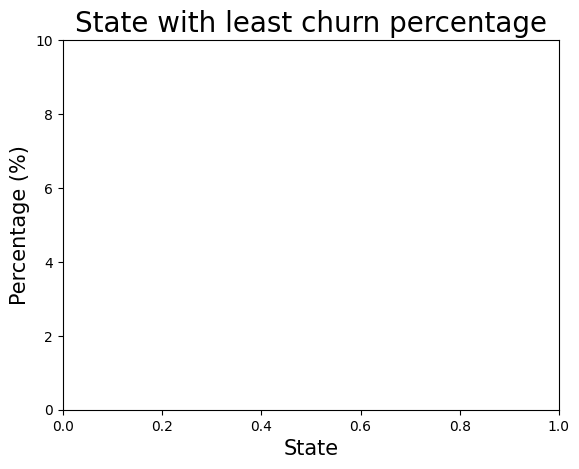

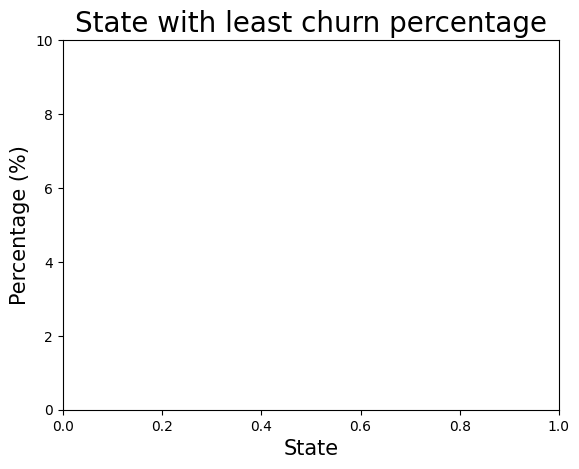

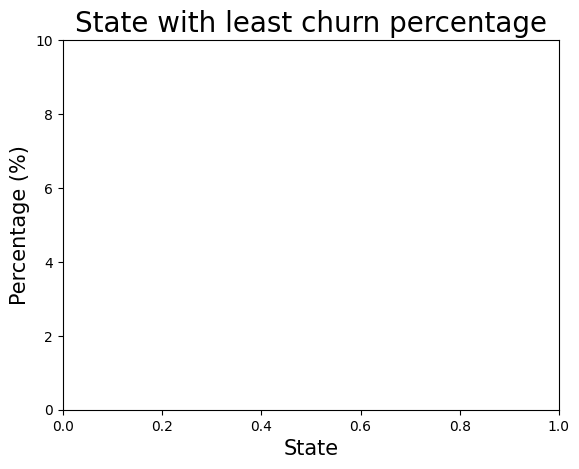

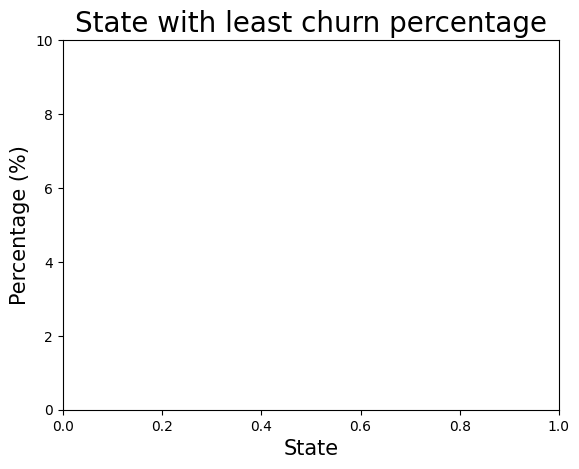

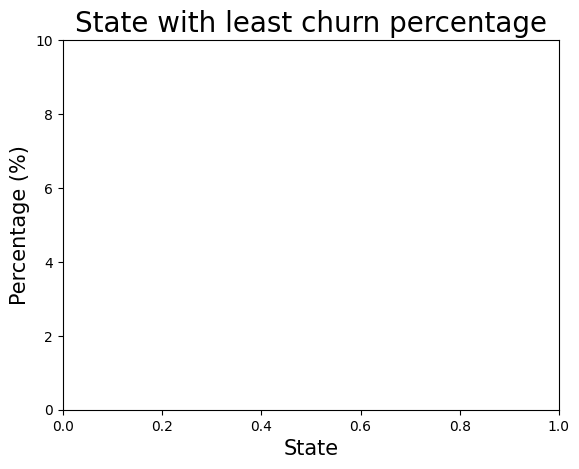

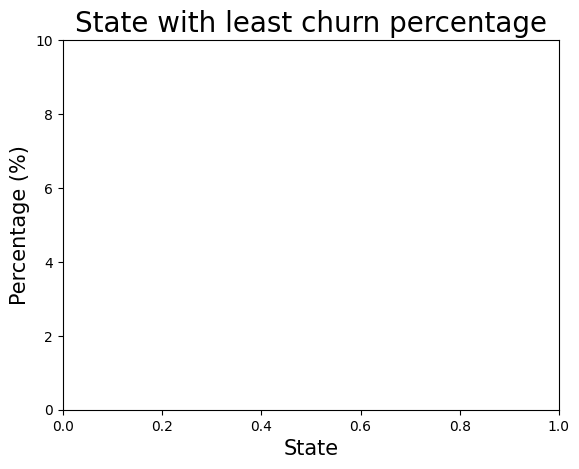

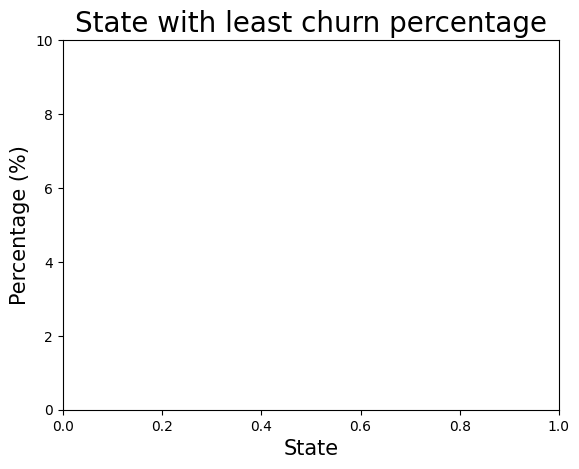

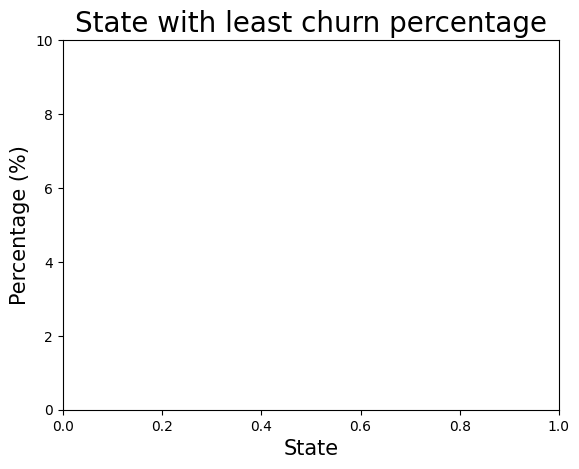

In [43]:

#Visualisation bottom 10 churned state
plt.figure(figsize=(10,15))
bar1 = ((telecom_df.groupby(['State'])['Churn'].mean()*100).sort_values(ascending = True).reset_index(name="Average True Churn").head(10))
plots = sns.barplot(data = bar1, x = 'State', y="Average True Churn")
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                 size=12, xytext=(0, 8),
                 textcoords='offset points')

  plt.title("State with least churn percentage", fontsize = 20)
  plt.xlabel('State', fontsize = 15)
  plt.ylabel('Percentage (%)', fontsize = 15)
  # Setting limit of the y axis from 0 to 10
  plt.ylim(0,10)
  plt.show()

Churn
False    22
True      2
Name: count, dtype: int64
 


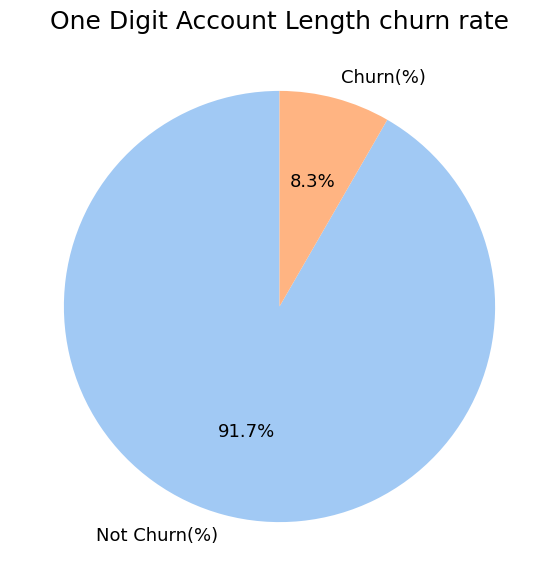

In [44]:
#Chart-4 One Digit Account Length
one_length = telecom_df[telecom_df['Account length']<=9].loc[:,['Churn']].value_counts()
print(one_length)
print(" ")

#Visualising One Digit Account Length Based on Churn percentage
#color palette selection
colors = sns.color_palette('pastel')[0:7]
textprops = {'fontsize':13}

plt.figure(figsize=(15,7))
#plotting pie chart
plt.pie(one_length, labels=['Not Churn(%)', 'Churn(%)'], startangle=90, colors=colors, autopct="%1.1f%%", textprops = textprops)
plt.title('One Digit Account Length churn rate', fontsize=18)
plt.show()

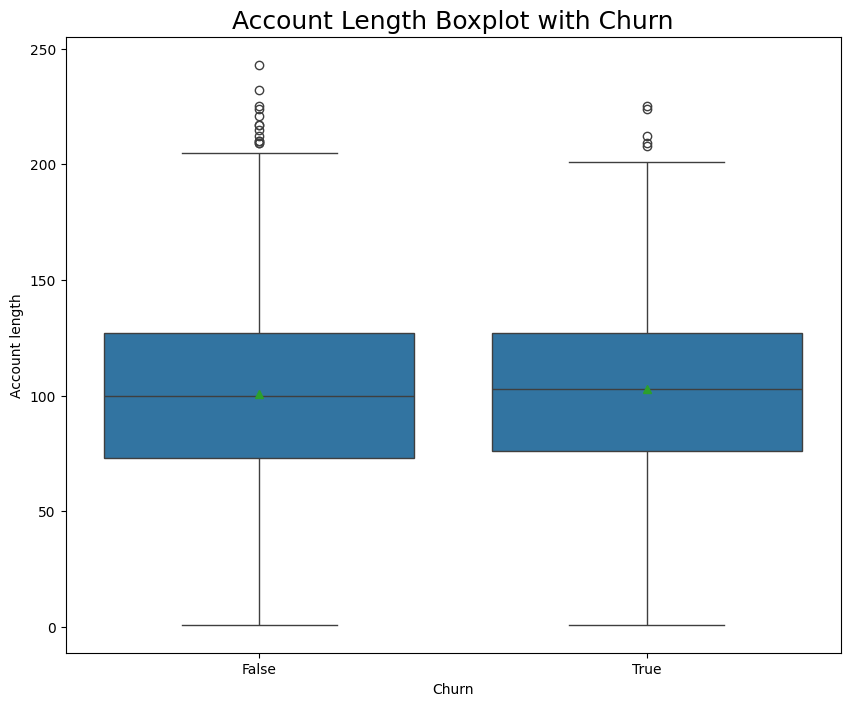

In [45]:
#Box Plot for Account Length attribute
plt.figure(figsize=(10,8))
sns.boxplot(data=telecom_df, x='Churn', y='Account length', showmeans = True)
plt.title('Account Length Boxplot with Churn', fontsize=18)
plt.show()

International plan
No     3010
Yes     323
Name: count, dtype: int64
 


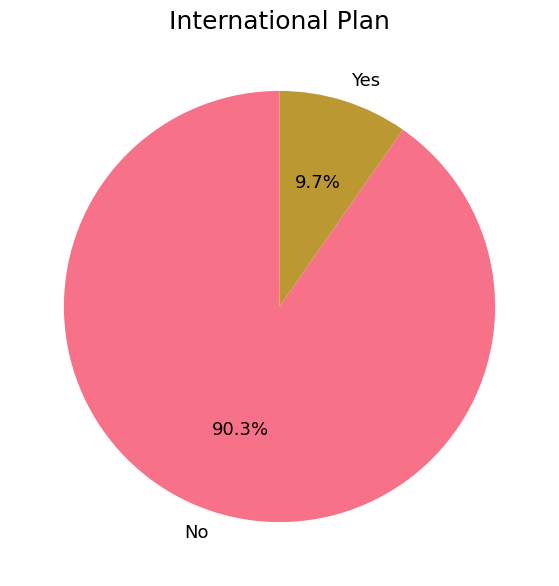

In [48]:
# Chart-5 visualisation code
#data for international plan
inter_plan = telecom_df['International plan'].value_counts()
print(inter_plan)
print(" ")

#Visualizing Percentage of customers taken international plan
#color palette selection
colors = sns.color_palette('husl')[0:7]
textprops = {'fontsize':13}

plt.figure(figsize=(15,7))
#plotting pie chart
plt.pie(inter_plan, labels=['No', 'Yes'],startangle=90, colors=colors, autopct="%1.1f%%", textprops = textprops)
plt.title('International Plan', fontsize=18)
plt.show()

In [51]:
#Assigning values for further charts
i1 = telecom_df['International plan'].unique()
i2 = telecom_df.groupby('International plan')['Churn'].mean()*100
i3 = telecom_df.groupby(['International plan'])['Total intl charge'].mean()
i4 = telecom_df.groupby(["Churn"])['Total intl minutes'].mean()

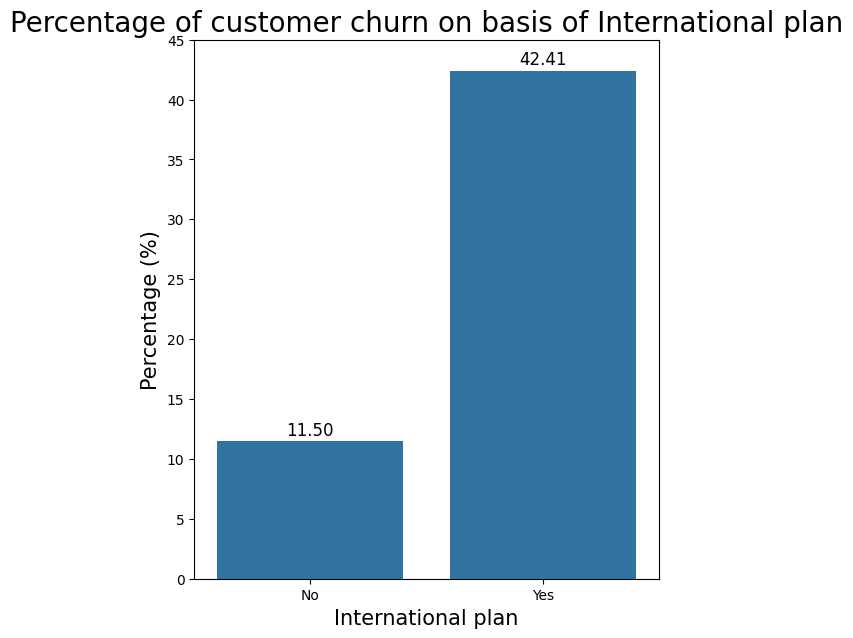

In [54]:
plt.figure(figsize=(6, 7))
plots = sns.barplot(x=i1, y=i2)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0, 8),
                   textcoords='offset points')  # Corrected typo 'textcoods' to 'textcoords'

plt.title("Percentage of customer churn on basis of International plan", fontsize=20)
plt.xlabel('International plan', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=15)
plt.ylim(0, 45)
plt.show()


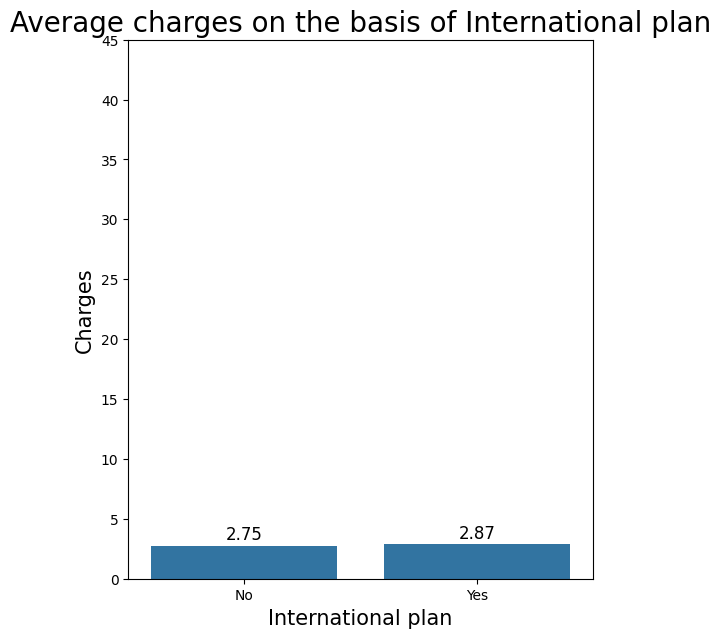

In [55]:
#Visualising code for average calling charge of customer having international plan
plt.figure(figsize=(6, 7))
plots = sns.barplot(x=i1, y=i3)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', size=12, xytext=(0, 8),
                   textcoords='offset points')  # Corrected typo 'textcoods' to 'textcoords'

plt.title("Average charges on the basis of International plan", fontsize=20)
plt.xlabel('International plan', fontsize=15)
plt.ylabel('Charges', fontsize=15)
plt.ylim(0, 45)
plt.show()


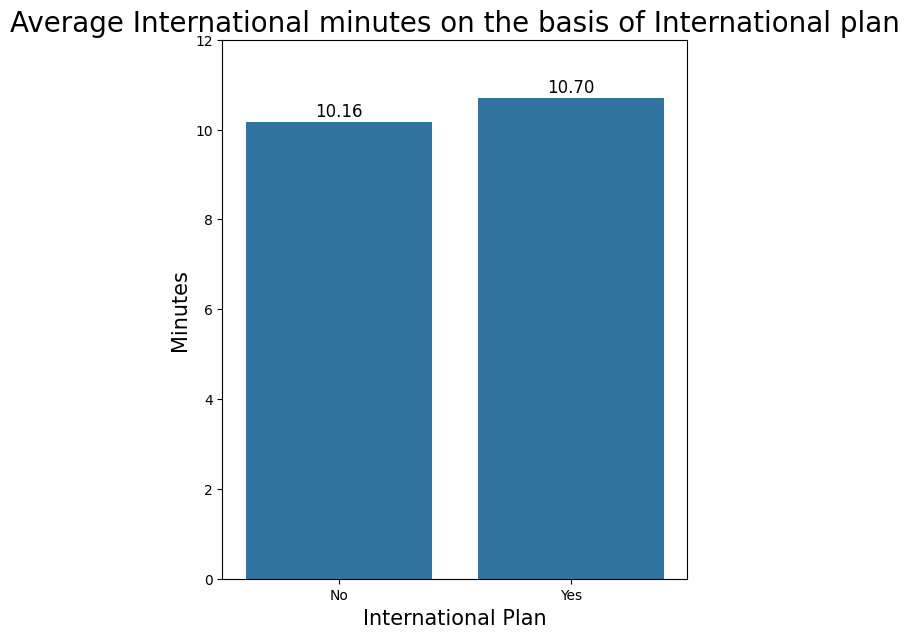

In [56]:
#Visualising code for average minutes talked by customers having international plan
plt.figure(figsize=(6, 7))
plots = sns.barplot(x=i1, y=i4)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', size=12, xytext=(0, 8),
                   textcoords='offset points')  # Corrected typo 'textcoods' to 'textcoords'

plt.title("Average International minutes on the basis of International plan", fontsize=20)
plt.xlabel('International Plan', fontsize=15)
plt.ylabel('Minutes', fontsize=15)
plt.ylim(0, 12)
plt.show()


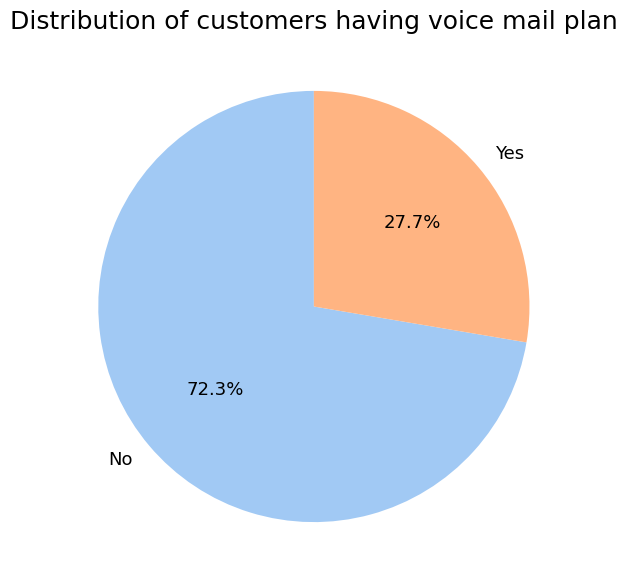

In [59]:
#Chart-6 visualisation code
 #data for voice mail plan
voice = telecom_df['Voice mail plan'].value_counts()

 # visualizing code for customers percentage having voice mail plan

 #color palette seletion
palette_color = sns.color_palette('pastel')
textprops = {'fontsize':13}

 #plotting chart of voice mail
plt.figure(figsize=(9,7))
plt.pie(voice, labels=['No', 'Yes'],startangle=90, colors=palette_color, autopct="%1.1f%%",textprops = textprops)
plt.title('Distribution of customers having voice mail plan', fontsize=18)
plt.show()

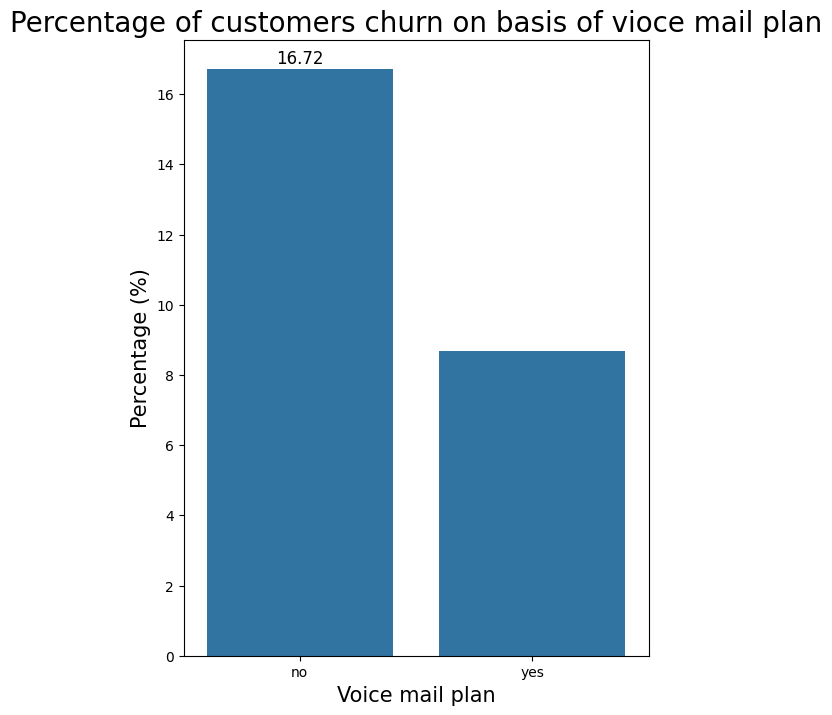

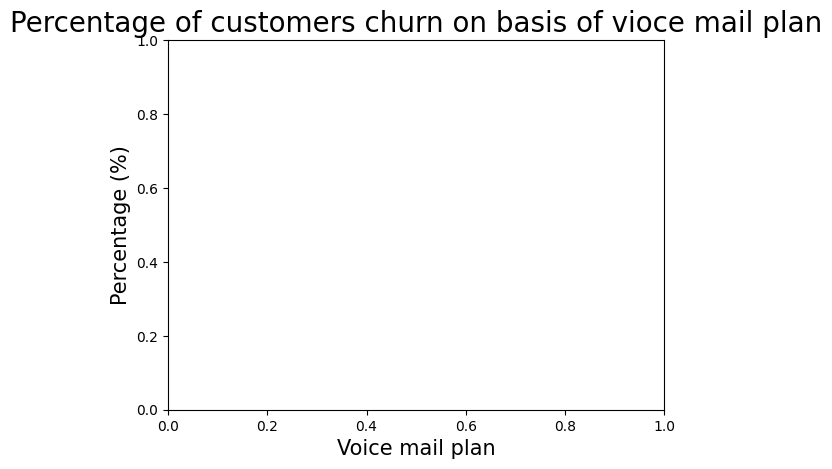

In [62]:
#Visualising code for customers churning while having voice mail plan

cc1=(['no','yes'])
cc2=telecom_df.groupby('Voice mail plan')['Churn'].mean()*100

plt.figure(figsize=(6,8))
plots = sns.barplot(x=cc1,y=cc2)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                 size=12, xytext=(0, 8),
                 textcoords='offset points')

  plt.title("Percentage of customers churn on basis of vioce mail plan", fontsize = 20)
  plt.xlabel('Voice mail plan', fontsize = 15)
  plt.ylabel('Percentage (%)', fontsize = 15)
  plt.show()

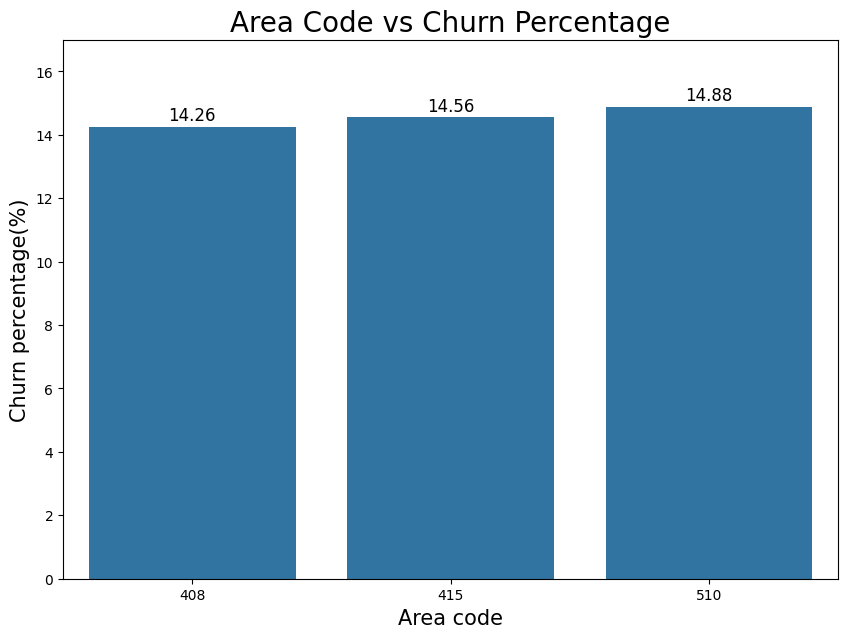

In [64]:
# Chart-7 Visualization code
# Visualizing Code or Area Code wise average churn percentage
a1 = telecom_df['Area code'].unique()
b1 = telecom_df.groupby('Area code')['Churn'].mean() * 100

plt.figure(figsize=(10, 7))
plots = sns.barplot(x=a1, y=b1)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Area Code vs Churn Percentage', fontsize=20)
plt.xlabel('Area code', fontsize=15)
plt.ylabel('Churn percentage(%)', fontsize=15)
plt.ylim(0, 17)
plt.show()


In [66]:
#Chart 8 visualisation code
#Average of total day calls, total day minutes & total day charge of churn
cn_dcalls = pd.DataFrame(telecom_df.groupby(['Churn'])['Total day calls'].mean())
print(cn_dcalls)
print('')
cn_dm = pd.DataFrame(telecom_df.groupby(["Churn"])['Total day calls'].mean())
print('')
cn_dm = pd.DataFrame(telecom_df.groupby(["Churn"])['Total day minutes'].mean())
print(cn_dm)
print('')
cn_dc = pd.DataFrame(telecom_df.groupby(["Churn"])['Total day charge'].mean())
print(cn_dc)

       Total day calls
Churn                 
False       100.283158
True        101.335404


       Total day minutes
Churn                   
False         175.175754
True          206.914079

       Total day charge
Churn                  
False         29.780421
True          35.175921


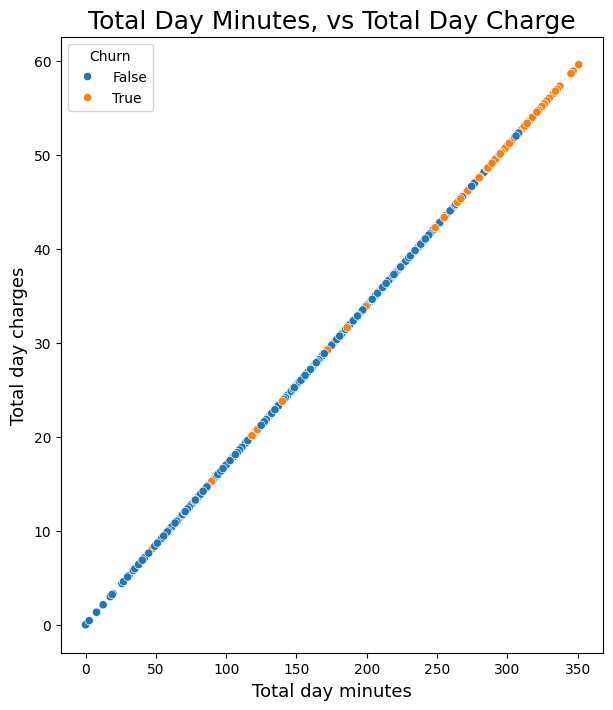

In [67]:
#Visualizing Total day minutes vs total day charge
plt.figure(figsize=(7,8))
sns.scatterplot(data=telecom_df, x="Total day minutes", y="Total day charge", hue='Churn')
plt.title('Total Day Minutes, vs Total Day Charge', fontsize=18)
plt.xlabel('Total day minutes',fontsize = 13)
plt.ylabel('Total day charges',fontsize = 13)
plt.show()

In [68]:
#Average of total eve calls, total eve minutes & total evening charge of churn
cn_ecalls = pd.DataFrame(telecom_df.groupby(["Churn"])['Total eve calls'].mean())
print(cn_ecalls)
print(" ")
cn_em = pd.DataFrame(telecom_df.groupby(["Churn"])['Total eve minutes'].mean())
print(cn_em)
print(" ")
cn_ec = pd.DataFrame(telecom_df.groupby(["Churn"])['Total eve charge'].mean())
print(cn_ec)

       Total eve calls
Churn                 
False       100.038596
True        100.561077
 
       Total eve minutes
Churn                   
False         199.043298
True          212.410145
 
       Total eve charge
Churn                  
False         16.918909
True          18.054969


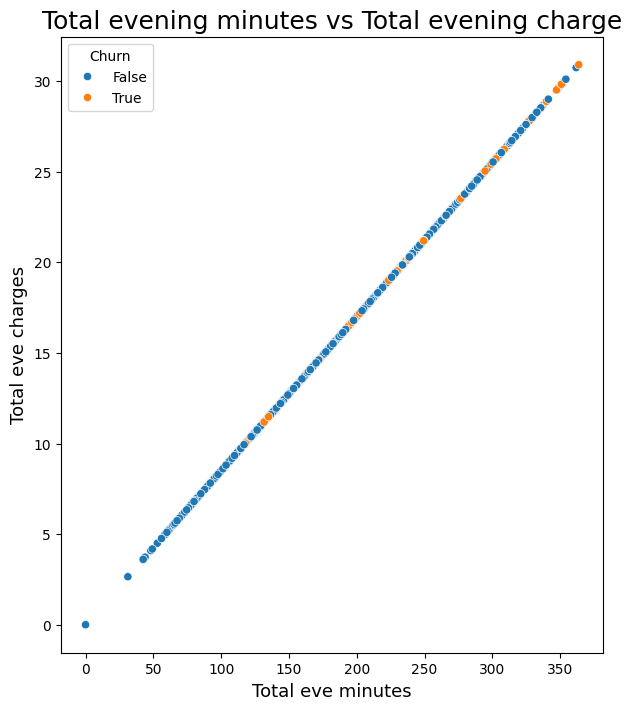

In [69]:
#Visualising total evening minutes vs total evening charge
plt.figure(figsize=(7,8))
sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=telecom_df)
plt.title('Total evening minutes vs Total evening charge', fontsize=18)
plt.xlabel('Total eve minutes',fontsize = 13)
plt.ylabel('Total eve charges',fontsize = 13)
plt.show()

In [73]:
# Average calls of total day on basis of churn
cn_dcalls = telecom_df.groupby('Churn')['Total day calls'].mean().reset_index()
cn_dcalls.rename(columns={'Total day calls': 'Avg Total Day Calls'}, inplace=True)

# Average calls of total evening on basis of churn
cn_ecalls = telecom_df.groupby('Churn')['Total eve calls'].mean().reset_index()
cn_ecalls.rename(columns={'Total eve calls': 'Avg Total Eve Calls'}, inplace=True)

# Average calls of total night on basis of churn
cn_ncalls = telecom_df.groupby('Churn')['Total night calls'].mean().reset_index()
cn_ncalls.rename(columns={'Total night calls': 'Avg Total Night Calls'}, inplace=True)


In [74]:
#Table of average calls of total day, eve & night on basis of churn
cn_calls = pd.merge(pd.merge(cn_dcalls,cn_ecalls, on = 'Churn'),cn_ncalls,on = 'Churn').round(2).T
cn_calls

,0,1
Churn,False,True
Avg Total Day Calls,100.28,101.34
Avg Total Eve Calls,100.04,100.56
Avg Total Night Calls,100.06,100.4


In [76]:
print(cn_calls.dtypes)


0    object
1    object
dtype: object


In [77]:
cn_calls = cn_calls.apply(pd.to_numeric, errors='ignore')


<Figure size 900x600 with 0 Axes>

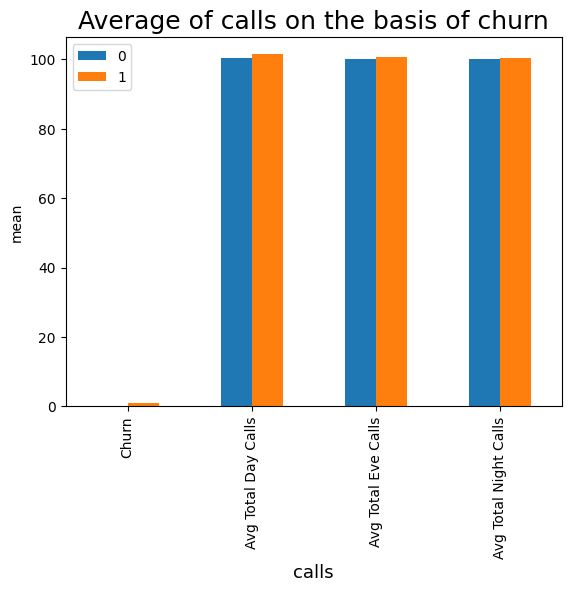

In [78]:
plt.figure(figsize=(9, 6))
cn_calls.plot(kind='bar', ylabel='mean')
plt.title('Average of calls on the basis of churn', fontsize=18)
plt.xlabel("calls", fontsize=13)
plt.show()


In [79]:
#Table of average minutes of total day, eve & night on basis of churn
cn_minutes = pd.merge(pd.merge(cn_dm,cn_em,on = 'Churn').round(2).T)
cn_minutes

TypeError: merge() missing 1 required positional argument: 'right'

In [80]:
# Assuming that cn_dm and cn_em are defined earlier
# Table of average minutes of total day, eve & night on basis of churn
cn_minutes = pd.merge(cn_dm, cn_em, on='Churn').round(2).T
print(cn_minutes)


Churn               False   True 
Total day minutes  175.18  206.91
Total eve minutes  199.04  212.41


<Figure size 900x600 with 0 Axes>

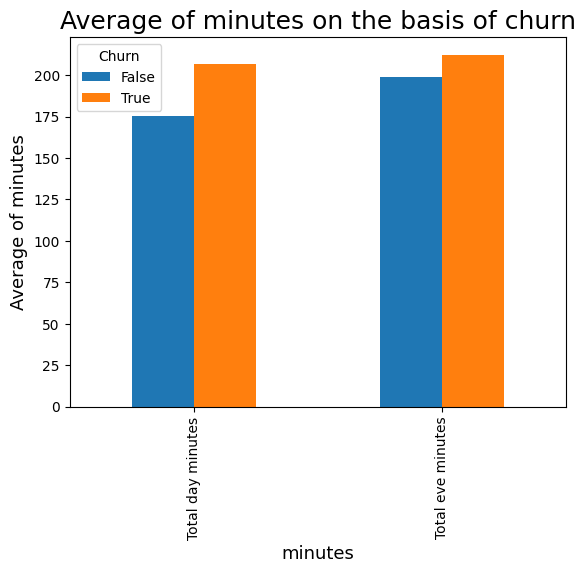

In [81]:
# Bar plot of above table
plt.figure(figsize=(9,6))
cn_minutes.plot(kind='bar',ylabel='mean')
plt.title('Average of minutes on the basis of churn', fontsize=18)
plt.xlabel("minutes", fontsize = 13)
plt.ylabel('Average of minutes', fontsize = 13)
plt.show()

In [83]:
# Average charges of total night on basis of churn
cn_nc = telecom_df.groupby('Churn')['Total night charge'].mean().reset_index()
cn_nc.rename(columns={'Total night charge': 'Avg Total Night Charge'}, inplace=True)


In [84]:
# Table of average charges of total day, eve and night on basis of churn
cn_charges = pd.merge(pd.merge(cn_dc, cn_ec, on='Churn'), cn_nc, on='Churn').round(2).T
print(cn_charges)


                            0      1
Churn                   False   True
Total day charge        29.78  35.18
Total eve charge        16.92  18.05
Avg Total Night Charge   9.01   9.24


<Figure size 900x700 with 0 Axes>

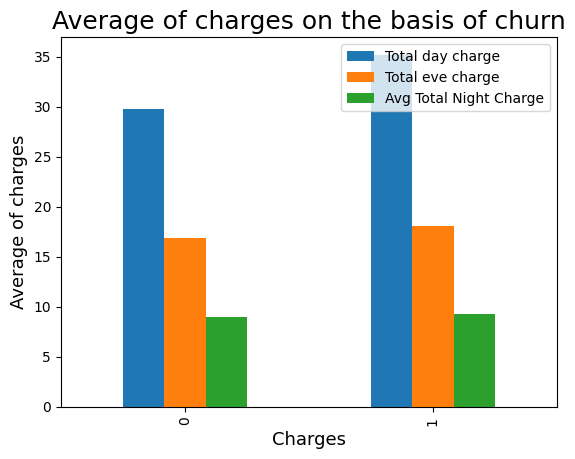

In [86]:
plt.figure(figsize=(9, 7))
cn_charges.T.plot(kind='bar', ylabel='Average of charges')
plt.title('Average of charges on the basis of churn', fontsize=18)
plt.xlabel("Charges", fontsize=13)
plt.ylabel('Average of charges', fontsize=13)
plt.show()


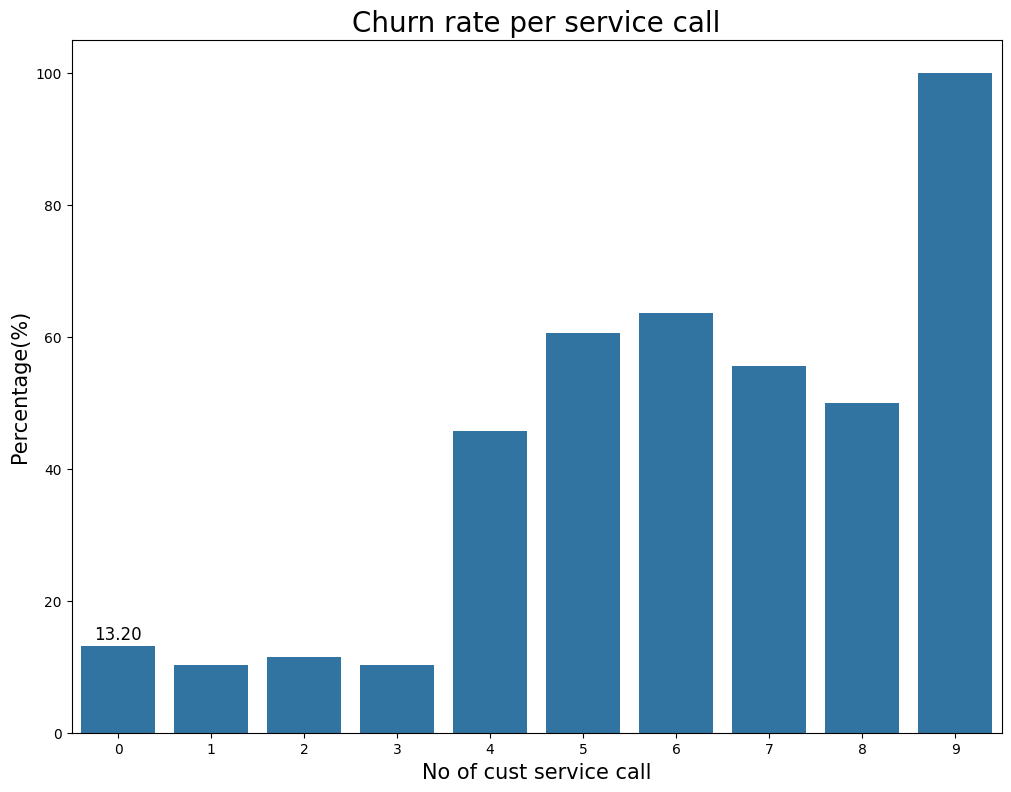

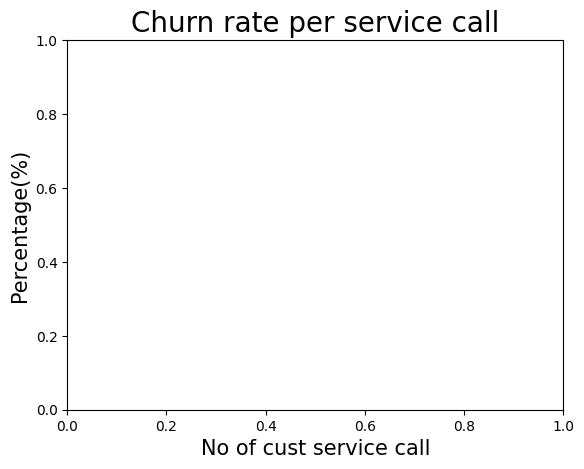

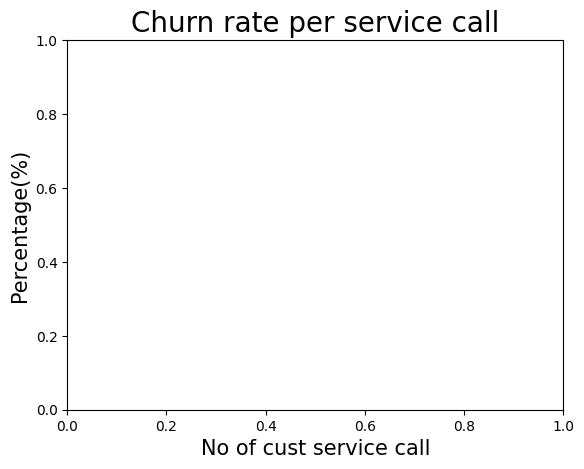

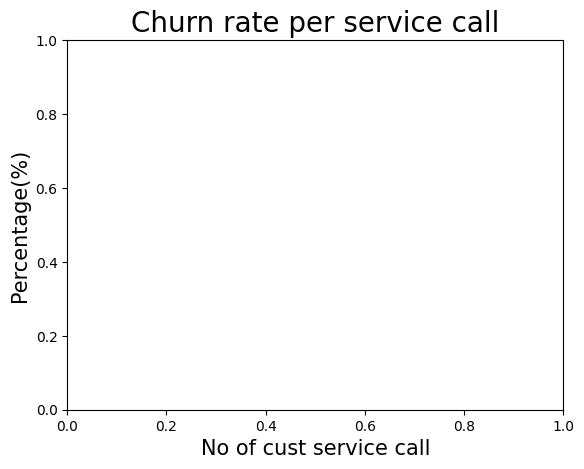

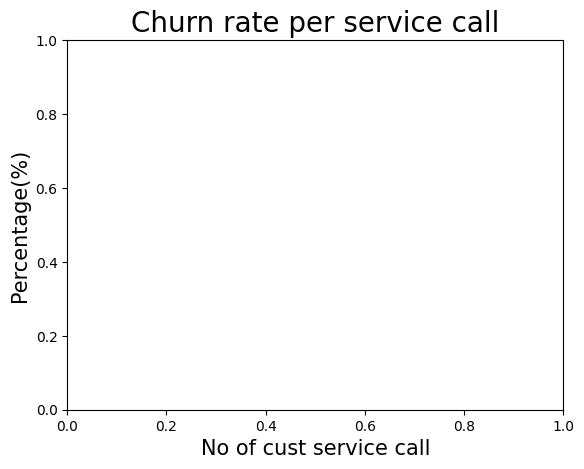

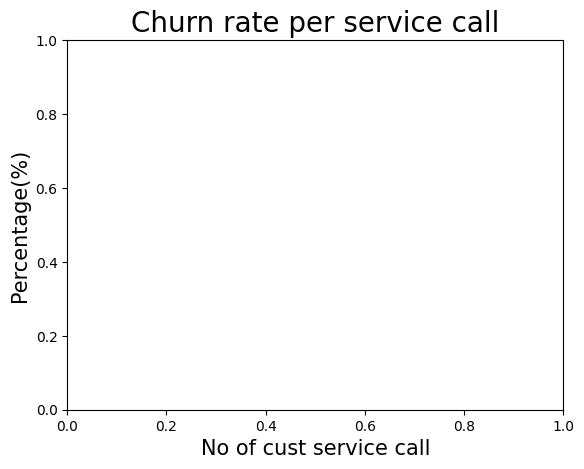

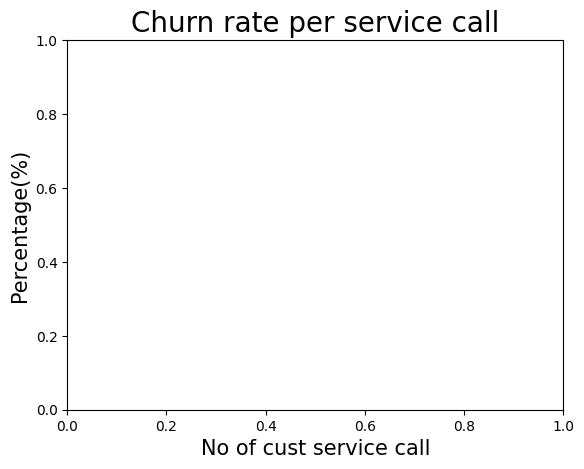

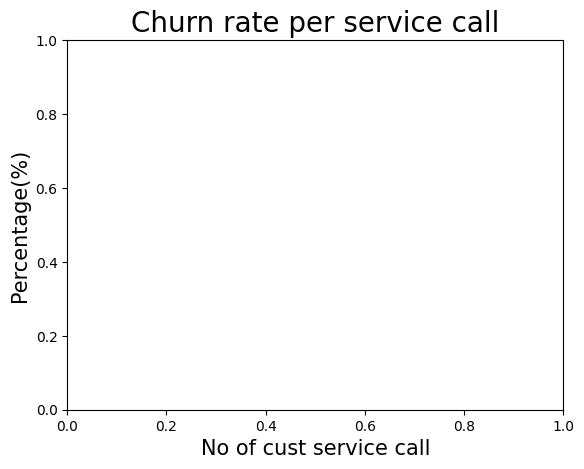

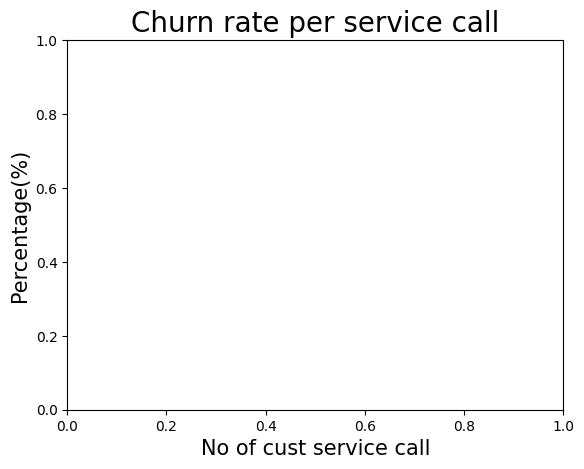

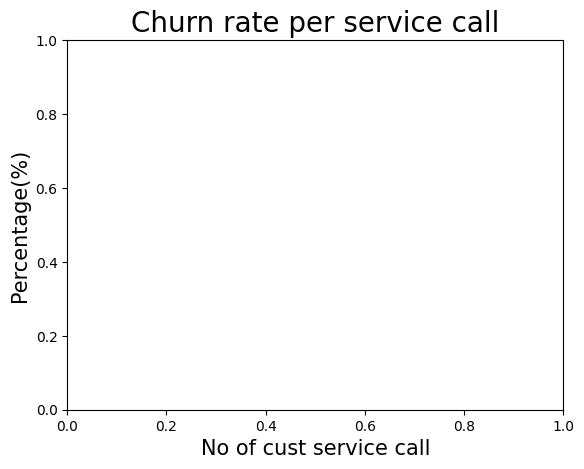

In [87]:
#Chart -9 visualisation code
# data for customer service calls
service = pd.DataFrame(telecom_df.groupby('Customer service calls')['Churn'].mean()*100)

#Visualising churn rate per customer service calls
plt.figure(figsize=(12,9))
plots = sns.barplot(x=service.index, y=service['Churn'])
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                 size=12, xytext=(0, 8),
                 textcoords='offset points')
  plt.title("Churn rate per service call", fontsize = 20)
  plt.xlabel('No of cust service call', fontsize = 15)
  plt.ylabel('Percentage(%)', fontsize = 15)
  plt.show()

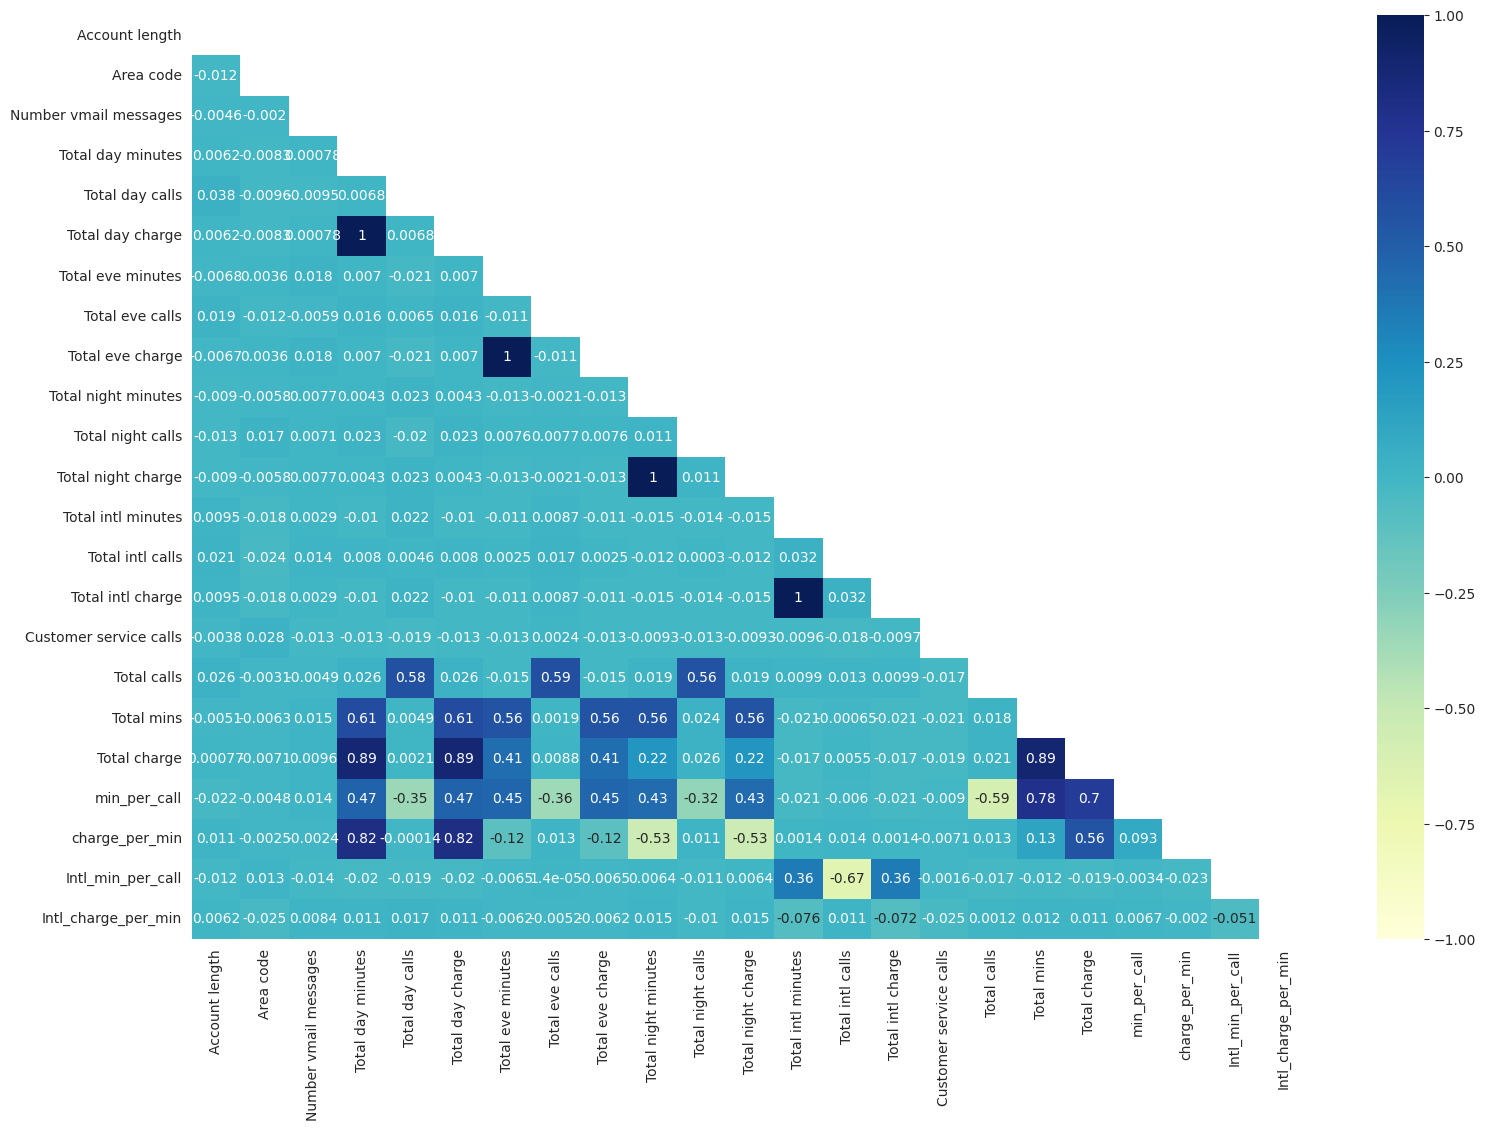

In [90]:
# Exclude non-numeric columns from DataFrame
numeric_telecom_df = telecom_df.select_dtypes(include=[np.number])

# Calculate correlation
corr = numeric_telecom_df.corr()

# Create the mask
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 12))
    ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')

plt.show()
